# **Assignment 1: Text Analysis**  

## Project Author  
**Name: Siddharth Arora**  
**Student ID: 25106954**  
**Email: siddharth.arora@student.uts.edu.au**  


# **1. Project Overview**  
This project is aimed to explore and identify the strengths and weakness of the **Australian Skills Classification (ASC)** which is a framework maintained by the government to structure and highlight different aspects of the Australian job market.  

Additionally, a **comparative analysis** is also performed with other global job taxonomies like **O*Net** (Occupational Information Network – USA) to help analyse the benefits and limitations of ASC as well.  

Multiple **NLP-based analysis techniques** were used to fulfil this project requirements. This involved using **Bi-gram and Tri-gram analysis** to grasp a basic understanding of different features of this project while other methods like **Topic Modelling and Clustering** were performed to garner better insights on the dataset.  

## **1.1 Research Question**

This project is aimed at answering 4 research questions to help analyse and find out the strength and weaknesses of Australian Skills Classification Dataset:
1. RQ1: Can similar occupations be clustered based on their core competency descriptions to assist users in finding related jobs?
3. RQ2: Can similar occupations be clustered based on their technology tools descriptions to assist users in finding related jobs?
4. RQ3: Can similar occupations be clustered based on their specialist skills descriptions to assist users in finding related jobs?
5. RQ4: What are the similarities and differences between ASC and O*Net, while analysing their respective strengths and weaknesses?


# **2. Setting up the project**
A basic setup is done where basic libraries required are imported to intitate the project.

These include various data manipulation libraries and data visualisation libraries

## **2.1 Importing Basic Libraries**

1. Data Manipulation and Numerical Data Handling : Pandas and Numpy
2. Data Visualisation : Matplotlib and Seaborn
3. NLP based operations : nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string



In [80]:
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 2.2 **Accessing the data**
The project initiated with loading the dataset into the notebook and extracting all the sheets to form
individual dataframes for better clarity and exploration

Out of the 11 available sheets, we extracted 8  that could be divided into 3 broad categories

The extracted sheets were
1. Occupation descriptions  
2. Core competency descriptions  
3. Specialist tasks hierarchy  
4. Tech tools hierarchy  
5. Core competencies  
6. Specialist tasks data  
7. Technology tools  
8. Appendix - tech tool examples  

In [3]:

file_path = "Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools", "Appendix - tech tool examples"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0], engine = "openpyxl")
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1], engine = "openpyxl")
cc_df = pd.read_excel(file_path, sheet_name=sheets[4], engine = "openpyxl")
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2], engine = "openpyxl")
st_df = pd.read_excel(file_path, sheet_name=sheets[5], engine = "openpyxl")
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3], engine = "openpyxl")
tt_df = pd.read_excel(file_path, sheet_name=sheets[6], engine = "openpyxl")
tt_eg = pd.read_excel(file_path, sheet_name=sheets[7], engine = "openpyxl")


In [4]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
    ("tt_eg", tt_eg)
]

for name, df in df_list:
    print(f"{name} columns: )", df.info())
    print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB
occupation_df columns: ) None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value              

# **3. Basic Data Understanding**

### **Overview**

The dataset provided is a **2023 Australian Skill Classification Dataset** that contains several different topics in the form of sheets. This data was divided into **three main divisions**:  

- **Core Competencies**: Identify and relate core skills required for different jobs  
- **Specialist Tasks**: Skills that are niche to their respective occupations  
- **Tools**: How different occupations rely on distinct technology tools and its correlation  

### **Dataset Specifications**  
- **Size**: 3.39 MB  
- **Name**: Australian Skills Classification - December 2023  
- **Format**: xlsx (Microsoft Spreadsheet)  
- **No. of Sheets**: 11  


## **3.1 Exploratory Data Analysis**

Out of the 11 available sheets, we extracted 8 of them that could be divided into 3 broad categories



### **3.1.1 EDA - Occupation List Dataframe**

The Occupation List dataframe will give us an understanding of how different occupations are listed in the ASC their different Coding methodologies (Unique Keys) as well as their descriptions



In [5]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [6]:
occupation_df.head()

Occupation Type  ANZSCO Code Sub-Profile Code  \
0        ANZSCO 4         1111              NaN   
1        ANZSCO 4         1112              NaN   
2        ANZSCO 4         1211              NaN   
3        ANZSCO 4         1213              NaN   
4        ANZSCO 4         1215              NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1                         General Managers   
2                      Aquaculture Farmers   
3                        Livestock Farmers   
4                   Broadacre Crop Growers   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  General Managers plan, organise, direct, contr...  
2  Aquaculture Farmers plan, organise, control, c...  
3  Livestock Farmers plan, organise, control, coo...  
4  Broadacre Crop Growers plan, organise, control...

In [7]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation'
 'NEC Category']


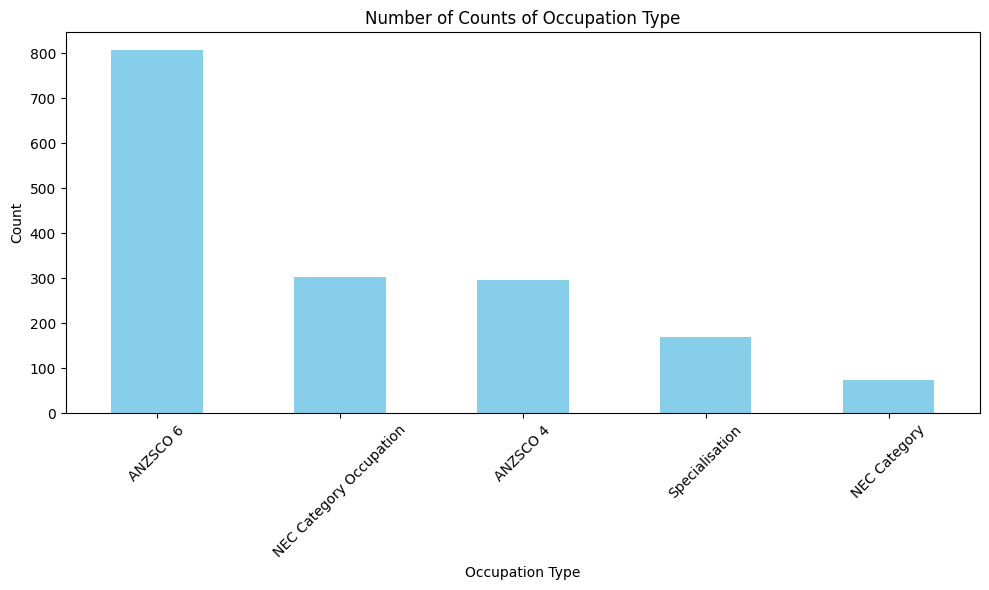

In [8]:
occupation_counts = occupation_df['Occupation Type'].value_counts()

plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Number of Counts of Occupation Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The occupations were divided into 5 core categories i.e. ANZSCO 4, ANZSCO 6, Specialisation, NEC Category Occupation and NEC Category. From external research on the dataset [research link APA] it was discovered that these divisions are hierarchical and that the ASC dataset is not representing this clearly


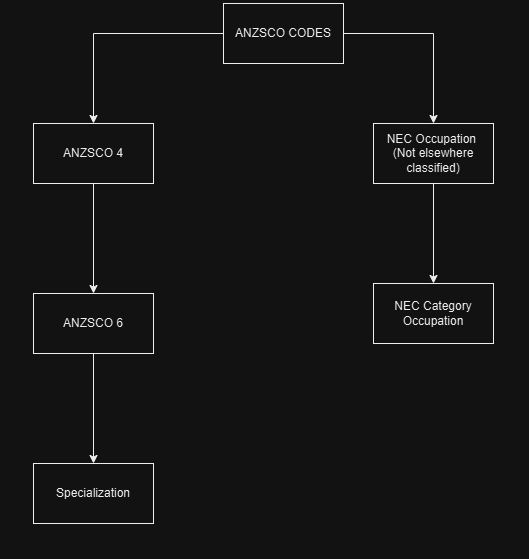

The dataset was highly representative of ANZSCO 6  Occupations, which make sense as these are the granular jobs representations

In [9]:
print("There are",occupation_df['ANZSCO Title'].count(), "different occupations listed")

There are 1650 different occupations listed


In [10]:
duplicate_counts = occupation_df['ANZSCO Title'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]

if not duplicates.empty:
    print("Duplicated ANZSCO Titles and their counts:\n", duplicates)
else:
    print("There is no job duplication in the dataset.")


There is no job duplication in the dataset.


Occupation Dataframe Details:
1.	Count of Jobs : 1650 unique jobs
2.	Duplication : not present
3.	Null Values : Only present in Sub Profile Code as it is only represented under Specialisation and NEC Category


In [11]:
occupation_types_with_subprofile = occupation_df.loc[occupation_df['Sub-Profile Code'].notna(), 'Occupation Type'].unique()
print("Occupation Types with Sub-Profile Code:\n", occupation_types_with_subprofile)


Occupation Types with Sub-Profile Code:
 ['Specialisation' 'NEC Category Occupation']


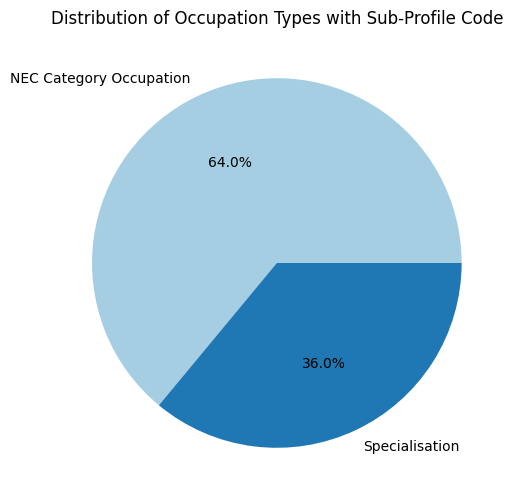

In [12]:
occupation_counts = occupation_df.loc[occupation_df['Sub-Profile Code'].notna(), 'Occupation Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Occupation Types with Sub-Profile Code")
plt.show()


Another feature present was the sub profile code, on initial look it looked like a lot of values were missing, but on a deeper analysis, it was found that this also represented a smaller division of Specialisation and NEC Category Occupation

In [13]:
duplicate_counts = occupation_df['ANZSCO Description'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]

if not duplicates.empty:
    print("Duplicated ANZSCO Description and their counts:\n", duplicates)
else:
    print("There is no job description duplication in the dataset.")

There is no job description duplication in the dataset.


## **3.2 EDA - Core Competency Dataframes**


Core competencies were spread across 2 different dataframes as it served different purposes.
1. Core Competency Description : It shows what total core competencies are as determined by the National Skills Commission while also relaying information about their subdivision and acts as an index.
2. Core Competency Data : This dataframe shows what different jobs require different level of these core competencies.


### 3.2.1 **Core Competency Description Dataframe**

In [14]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


This dataframe consisted of 5 features with no null values

In [15]:
cc_desc_df.head()

Core Competency                        Core Competency Description  \
0  Digital engagement  Identifying and using technology (including ha...   
1  Digital engagement  Identifying and using technology (including ha...   
2  Digital engagement  Identifying and using technology (including ha...   
3  Digital engagement  Identifying and using technology (including ha...   
4  Digital engagement  Identifying and using technology (including ha...   

   Score Proficiency Level                                       Anchor Value  
0      1             Basic  Name and identify the purpose of familiar digi...  
1      2             Basic  Send a short and simple reply to an email comm...  
2      3             Basic                  Enter information into a database  
3      4      Intermediate  Recognise different ways to connect to the int...  
4      5      Intermediate  Build and maintain an effective online profile...

In [16]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


It is showcasing 10 different Core Competencies  with no duplication.

### **3.2.2 Core Competency Dataframe**

In [17]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


This dataframe consisted of 5 features, showcasing 10 different Core Competencies each with 10 different scores that highlighted the proficiency level of that competency.
It features no null values and no duplication.


In [18]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


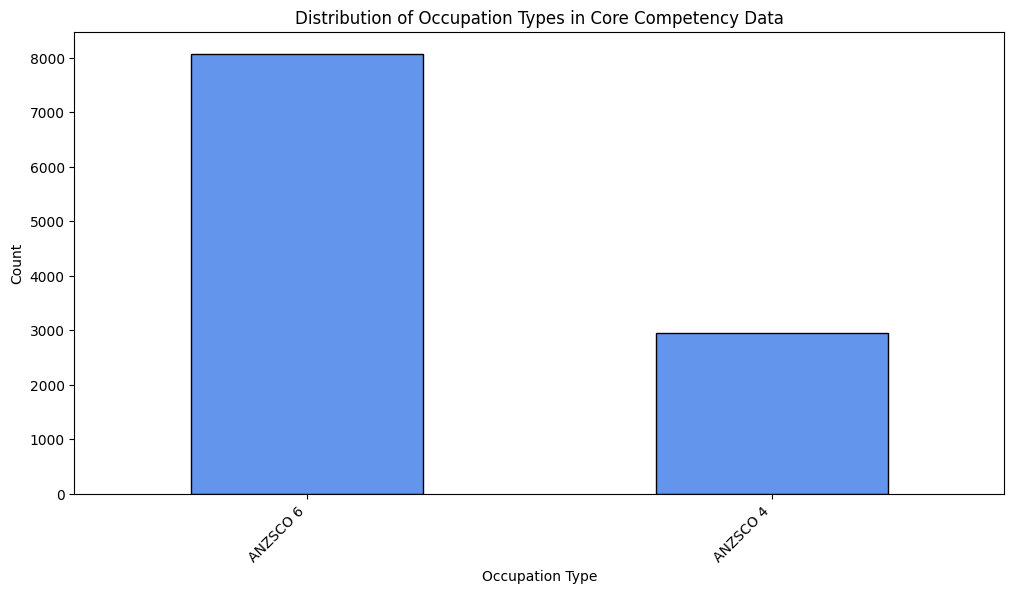

In [19]:
occupation_type_counts = cc_df['Occupation Type'].value_counts()

plt.figure(figsize=(12, 6))
occupation_type_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Distribution of Occupation Types in Core Competency Data")
plt.xticks(rotation=45, ha='right')
plt.show()

This dataset only features 2 job types (ANZSCO 4 and ANZSCO 6) while listing 1101 different job titles under them.

In [20]:
cc_counts = cc_df.groupby("ANZSCO Title")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("All ANZSCO Titles have exactly 10 core competencies.")
else:
    print("Some ANZSCO Titles have more or less than 10 core competencies.")


All ANZSCO Titles have exactly 10 core competencies.


There is no inconsistency present in the dataset as all the jobs have 10 core competencies which is crucial as this will not cause any disruption in NLP based analysis.

## **3.3 Specialist Task Dataframe**


The specialist task category of ASC dataset also is divided into 2 parts similar to core competencies.
1. Specialist Task Hierarchy : An index to what different specialist tasks there are and how they are divided among different groups and sub division, along with their descriptions
2. Specialist Task : Links the specialists tasks performed by different jobs and give details about how much time is spent on these tasks along with their clusters.


### **3.3.1 Specialist Task Hierarchy Dataframe**


In [21]:
st_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Specialist Task     1686 non-null   object
 1   Specialist Cluster  1686 non-null   object
 2   Cluster Family      1686 non-null   object
 3   Skill Statement     1686 non-null   object
dtypes: object(4)
memory usage: 52.8+ KB


This dataframe has 4 features that focus on different specialist skills and how they are divided into different clusters and cluster families. It also gives a brief description of these skills for better comprehension.

In [22]:
st_hier_df.head()

Specialist Task  \
0  Advise others on farming or forestry operation...   
1  Estimate labour or resource requirements for f...   
2         Promote agricultural or hunting activities   
3                       Develop agricultural methods   
4   Evaluate quality or condition of plants or crops   

                         Specialist Cluster           Cluster Family  \
0  Direct or advise on agricultural matters  Agriculture and animals   
1  Direct or advise on agricultural matters  Agriculture and animals   
2  Direct or advise on agricultural matters  Agriculture and animals   
3    Manage agricultural processes or tasks  Agriculture and animals   
4    Manage agricultural processes or tasks  Agriculture and animals   

                                     Skill Statement  
0  Provide advice about managing farms and forest...  
1  Calculate or estimate labour, equipment, and r...  
2  Raise awareness of agricultural practices and ...  
3  Develop or design new or improved agricultural...  
4  Judge the physical quality, health and conditi...

In [23]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


There are no null values and 1686 total skills mentioned in the dataset which are spread across 272 clusters, which are further forming 31 cluster families

In [24]:
!pip install squarify

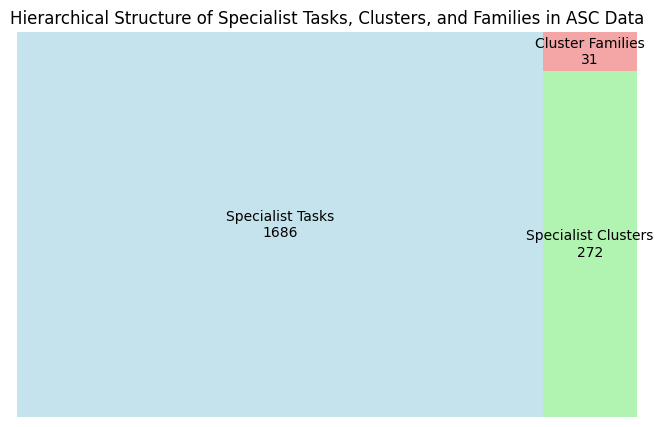

In [25]:
import squarify


counts = {
    "Specialist Tasks": st_hier_df['Specialist Task'].nunique(),
    "Specialist Clusters": st_hier_df['Specialist Cluster'].nunique(),
    "Cluster Families": st_hier_df['Cluster Family'].nunique(),
}

labels = [f"{key}\n{value}" for key, value in counts.items()]
plt.figure(figsize=(8, 5))
squarify.plot(sizes=counts.values(), label=labels, color=["lightblue", "lightgreen", "lightcoral"], alpha=0.7)
plt.title("Hierarchical Structure of Specialist Tasks, Clusters, and Families in ASC Data")
plt.axis("off")
plt.show()


The above visualisation made using Squarify library, shows the hieracrchy distribution of different cluster families, clusters and their specialist skills

<ipython-input-26-b34c5ace404c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Task', data=top_10_cluster_families, palette='viridis')


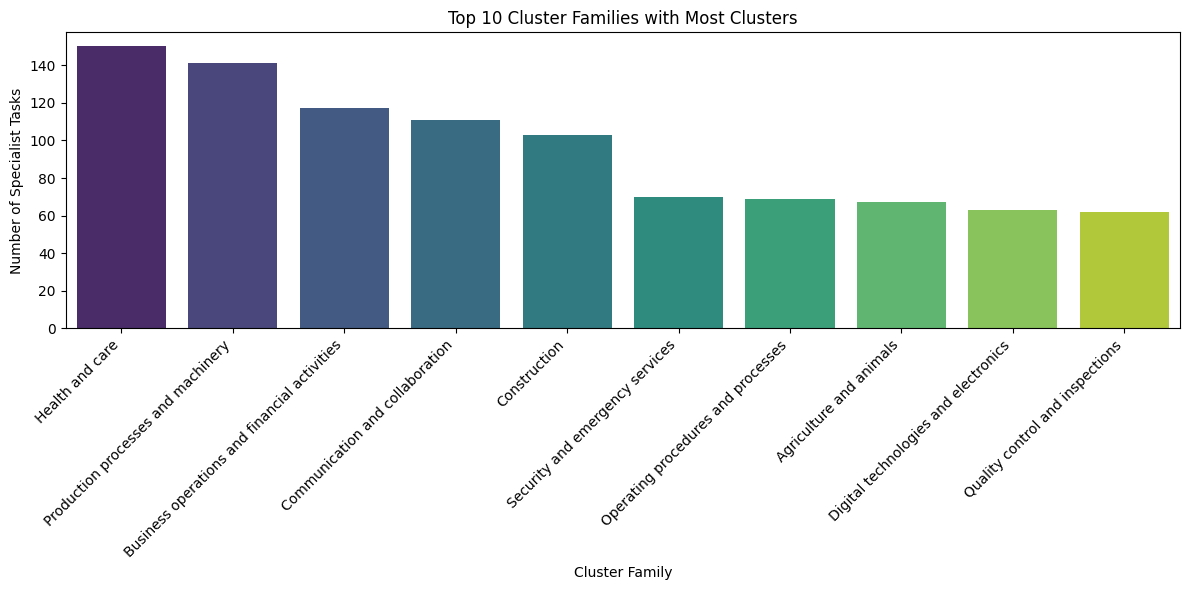

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cluster_family_counts = st_hier_df.groupby('Cluster Family')['Specialist Task'].nunique().reset_index()
cluster_family_counts = cluster_family_counts.sort_values(by='Specialist Task', ascending=False)
top_10_cluster_families = cluster_family_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Task', data=top_10_cluster_families, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Tasks')
plt.tight_layout()
plt.show()


“Health and Care” Cluster Family had the most amount of specialist skills (140) and the top 10 also included jobs like Financial Activities, Construction and Agriculture.

### **3.3.2 Specialist Task Dataframe**

This dataframe lists different specialist tasks performed by occupations

In [27]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


This dataframe lists different specialist tasks performed by occupations while also showcasing in detail the time distribution spent over these tasks to highlight the most important or crucial tasks performed. It also labels tasks as trending/emerging to highlight their importance

This dataset has 12 features with null values in some records for % time spent.

In [28]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1575 different occupations listed


There are total 4 occupation types listed

<ipython-input-29-8d1248ed0494>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')


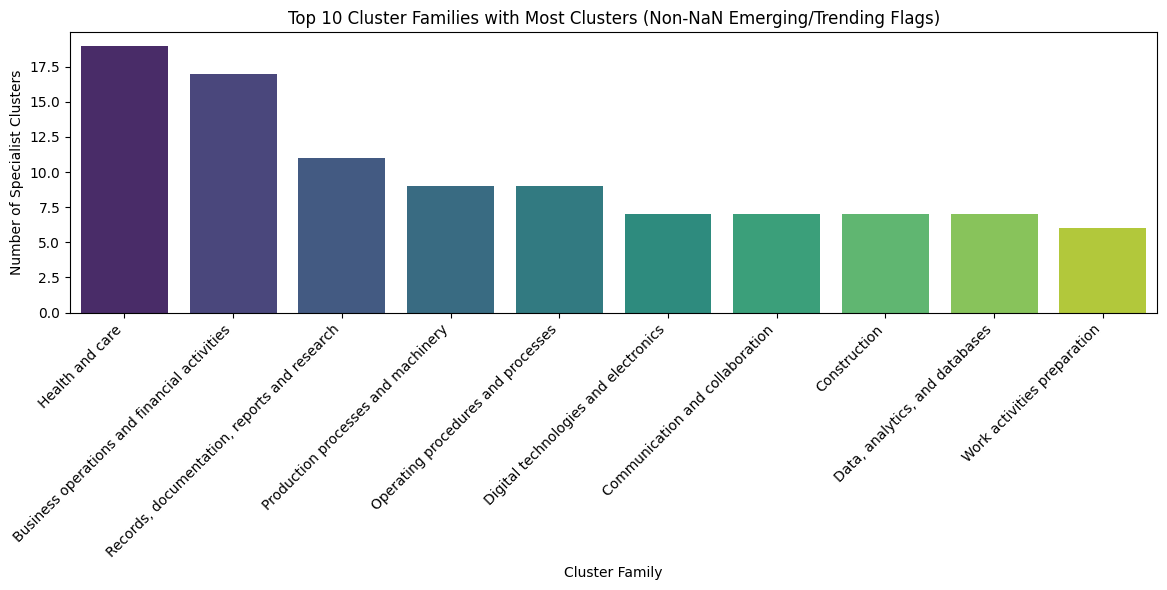

In [29]:
filtered_df = st_df[st_df['Emerging/\nTrending Flag'].notna()]
cluster_family_counts_filtered = filtered_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()
cluster_family_counts_filtered = cluster_family_counts_filtered.sort_values(by='Specialist Cluster', ascending=False)

top_10_cluster_families_filtered = cluster_family_counts_filtered.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters (Non-NaN Emerging/Trending Flags)')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


“Healthcare” has been listed as the cluster family with the most amount of Emerging/Trending Skills followed by “Business operations and Financial Activities”

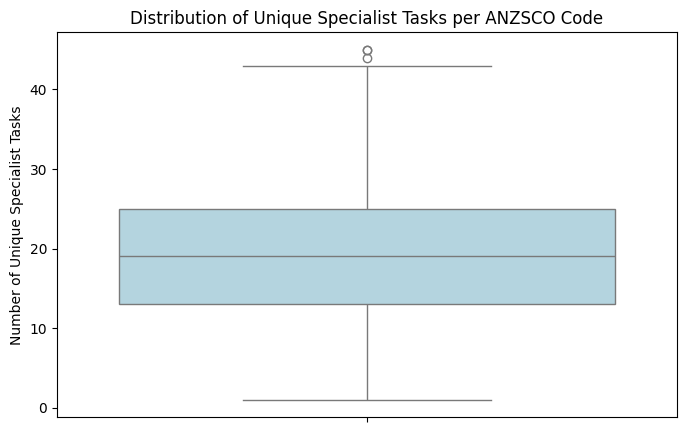

In [30]:
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")
plt.show()


On average a job title will have around 19 specialist tasks assigned (as seen in the box plot visualised above) with a few exceptions having more than 40 such tasks, which makes these jobs highly niche. “Systems Administrator” and “Web Administrator” have 45 specialist tasks listed under them.

In [31]:
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

top_10 = st_counts.nlargest(10).reset_index()
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              Systems Administrator   
1       313113                                  Web Administrator   
2       249212                    Dance Teacher (Private Tuition)   
3         2412                            Primary School Teachers   
4       241213                             Primary School Teacher   
5       263111              Computer Network and Systems Engineer   
6       322313                               Welder (First Class)   
7         2413  Middle School Teachers / Intermediate School T...   
8       241311  Middle School Teacher / Intermediate School Te...   
9       262111                             Database Administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


## **3.4 EDA - Technology Tools Dataframes**


The technology tools is a set of 3 dataframes that lists all the important tech tools and categories they belong in along with some examples. The data is divided in the following form:
1. Tech Tools Hierarchy: This dataframe talks about the different technology tools categorised into different sections along with their descriptions.
2. Tech Tools: This dataframe lists all the different technology tools linked with different professions in the Australian Job market.
3. Appendix Tech Tools: This dataframe lists different technology tools examples to give users a clear understanding.


### 3.4.1 Technology Tools Hierarchy

In [32]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


The dataset has 5 features, all of them containing 94 records, indicating 94 technology tools listed in the ASC.

In [33]:
tt_hier_df.head()

Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4                         Communication technologies   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4   Data, voice and/or video communication platforms   

                           Technology Tool  \
0  Collaborative news production platforms   
1          Music or sound editing software   
2                 Sound and audio hardware   
3      Video creation and editing software   
4        Audio/video conferencing software   

                         Technology Tool Description  \
0  Software used to create and manage news conten...   
1  Software used to create, manipulate, and edit ...   
2  Apparatus used to create, manipulate, mix and/...   
3  Software used to create and edit digital video...   
4  Software for collaboration using video or audi...   

                Technology Tool Extended Description  
0  Collaborative news production platforms encomp...  
1  Music and sound editing software incorporates ...  
2  Hardware and equipment used to generate electr...  
3  Video creation and editing software enables th...  
4  Audio/video conferencing software enables peop...

In [34]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())


The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


These 94 tools are divided into 27 categories

<ipython-input-35-a8c028fc552e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')


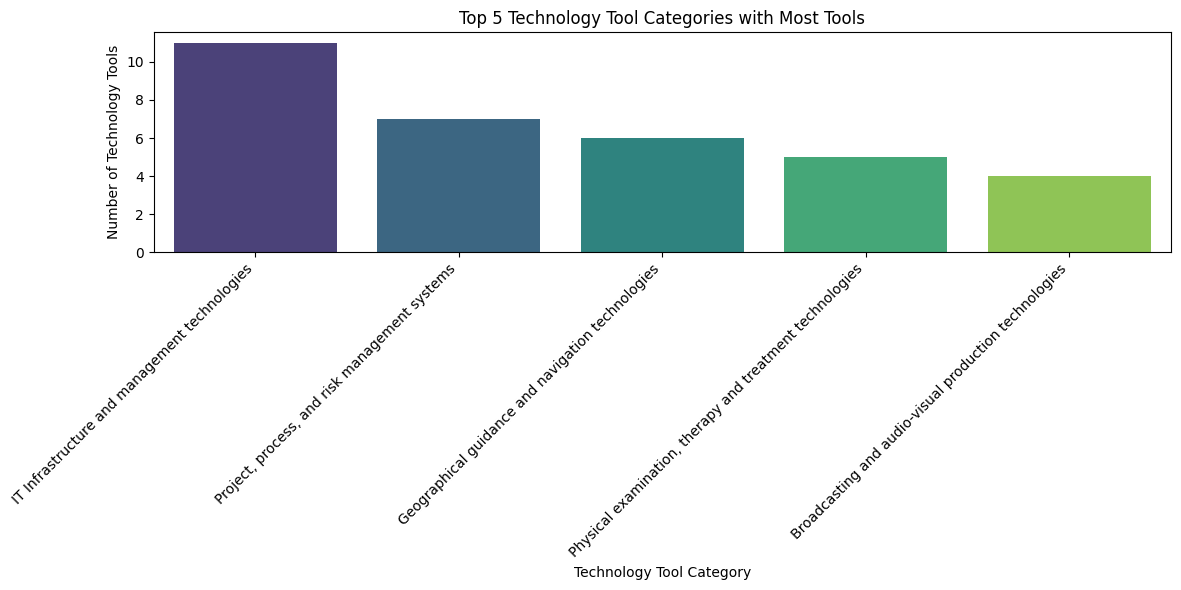

In [35]:
category_tool_counts = tt_hier_df.groupby('Technology Tool Category')['Technology Tool'].nunique().reset_index()
category_tool_counts = category_tool_counts.sort_values(by='Technology Tool', ascending=False)

top_5_categories = category_tool_counts.head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Technology Tool Categories with Most Tools')
plt.xlabel('Technology Tool Category')
plt.ylabel('Number of Technology Tools')
plt.tight_layout()
plt.show()

Unsurprisingly “IT Infrastructure” tool category has the most amount of different tools listed.

### 3.4.2 **Technology Tools Dataframe**

In [36]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


This dataset has 6 features, which links different jobs and the tools required by them to function.
It also mentions a trending/emerging flag where certain tools are given these tags to help identify new up and coming tools.


In [37]:
tt_df.head()

Occupation Type  ANZSCO Code Sub-Profile Code  \
0        ANZSCO 4         1111              NaN   
1        ANZSCO 4         1111              NaN   
2        ANZSCO 4         1111              NaN   
3        ANZSCO 4         1111              NaN   
4        ANZSCO 4         1111              NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1  Chief Executives and Managing Directors   
2  Chief Executives and Managing Directors   
3  Chief Executives and Managing Directors   
4  Chief Executives and Managing Directors   

                                     Technology Tool Emerging/Trending Flag  
0        Accounting and financial management systems                    NaN  
1                  Audio/video conferencing software                    NaN  
2  Business intelligence and decision support sof...                    NaN  
3                    Flow chart and diagram software                    NaN  
4                           Human resources software                    NaN

In [38]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1317 different occupations listed


The ASC dataset  has data for 1317 jobs along with their required technology tools.

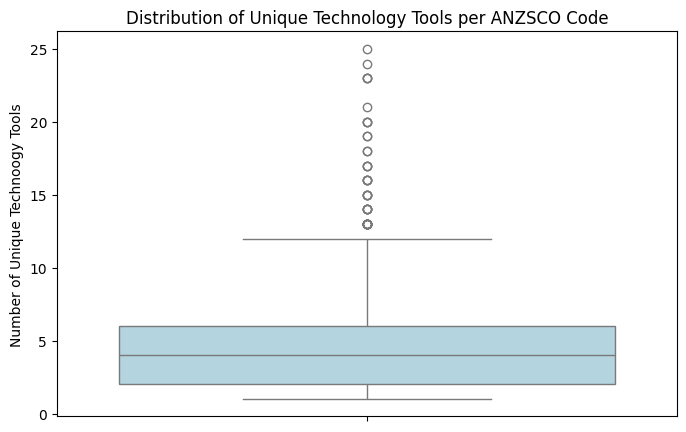

In [39]:
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")
plt.show()

On average a certain occupation requires just under 5 tools with the exceptions reaching as high as needing 25 tools to function as visualised in the boxplot above

In [40]:
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()
top_10 = tt_counts.nlargest(10).reset_index()

print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             Database Administrator   
1         2611                  ICT Business and Systems Analysts   
2       262113                              Systems Administrator   
3       263111              Computer Network and Systems Engineer   
4       263212                               ICT Support Engineer   
5         2621  Database and Systems Administrators, and ICT S...   
6       135199                                    Network Manager   
7       261111                               ICT Business Analyst   
8       263112                              Network Administrator   
9       261313                                  Software Engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


For example “Database Administrators” and “ICT Business and Systems Anlysts” require a whopping 25 and 24 tools respectively to function, making their jobs very technical

### **3.4.3 Tech Tools Examples**

In [41]:
tt_eg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Technology Tool          712 non-null    object
 1   Technology Tool Example  712 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


This is a pretty simple dataframe supporting two features, it lists the different technology tools and their specific examples complementing it.

Top 10 Technology Tools with the Most Technology Tool Examples
                                    Technology Tool  Technology Tool Example
79                 Science and engineering software                      157
85           Statistical and data analysis software                       58
81                           Scientific instruments                       27
2   Alternative and complementary therapy equipment                       12
92                                 Wearable devices                       11
73            Quotation and cost modelling software                       11
71                      Project management software                       10
48           IT network and backbone infrastructure                        9
3             Application and load testing software                        8
76                   Regulatory compliance software                        8


<ipython-input-42-6c7a148bbb05>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')


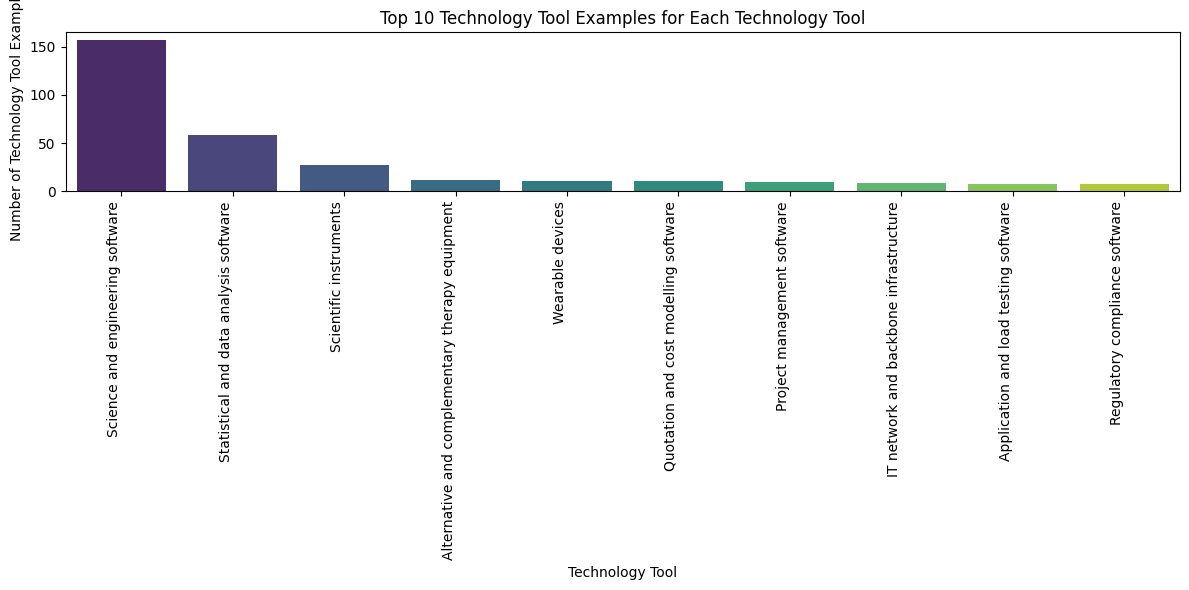

In [42]:
tool_example_counts = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

top_10_tool_example_counts = tool_example_counts.sort_values(by='Technology Tool Example', ascending=False).head(10)

print("Top 10 Technology Tools with the Most Technology Tool Examples")
print(top_10_tool_example_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Technology Tool Examples for Each Technology Tool')
plt.xlabel('Technology Tool')
plt.ylabel('Number of Technology Tool Examples')
plt.tight_layout()
plt.show()


As expected Science and Engineering Software’s form the most versatile group with 150+ tools mentioned with the second nearest option being Statistical and Data Analysis software at 50 tools

In [43]:
tt_eg_count_df = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()
tt_eg_count_df.columns = ['Technology Tool', 'Technology Tool Example Count']
print(tt_eg_count_df.head())  # Show the first few rows of the new DataFrame


                                   Technology Tool  \
0      Accounting and financial management systems   
1       Air, space, or watercraft guidance systems   
2  Alternative and complementary therapy equipment   
3            Application and load testing software   
4                      Application server software   

   Technology Tool Example Count  
0                              5  
1                              5  
2                             12  
3                              8  
4                              5  


A new dataframe was created from this set called tt_eg_count to help group these technology tools and their frequencies for better analysis later.

# **4. Data Preparation**



This is a crucial step for this project as the dataset was divided into multiple sheets. To make a interpretable and relational analysis of this Skills Classification dataset, the data was merged into different dataframes.

## **4.1 Data Merging**

As there were different structures to each information, they were merged slightly differently, but the end result was similar where it showed that specific information linked to their respective occupations.
The 3 datasets created were:
1. Tech Tools Merged (tt_merged_df)
2. Core Competencies Merged (cc_merged_df)
3. Specialist Tasks Merged (st_merged_df)

In [44]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:")
    print(merged_df.head())
    return merged_df


tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Title")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Title")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                   

In [45]:
tt_merged_df = pd.merge(tt_merged_df, tt_eg_count_df, on='Technology Tool', how='left')

print("Merged DataFrame:")
print(tt_merged_df.head())

Merged DataFrame:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                         Techno

In [46]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  Occupation Type_y                     5736 non-null   object 
 11  ANZSCO Code_y    

In [47]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  Specialist Cluster_y         30450 non-null  object 
 13  Cluster Family_y

In [48]:
def merge_cc_df(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df


cc_merged_df = merge_cc_df(cc_df, cc_desc_df, occupation_df)


Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      In

In [49]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

As can bee seen in the end 3 merged files were created
1. st_merged_df
2. tt_merged_df
3. cc_merged_df

## 4.2 **Merged Dataset Cleaning and Analysis**

### **4.2.1 Tech Tools Merged Analysis**

A few columns were duplicating and thus were dropped to maintain data integrity. It was also observed that only 4 records had missing job descriptions and technology example count, but as the number is not huge it can be ignored

In [50]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  Occupation Type_y                     5736 non-null   object 
 11  ANZSCO Code_y    

In [51]:
tt_merged_df.drop(columns=[ "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Code_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code_x', 'Sub-Profile Code_x', 'ANZSCO Title',
       'Emerging/Trending Flag', 'ANZSCO Description',
       'Technology Tool Example Count'],
      dtype='object')

In [52]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  ANZSCO Description                    5736 non-null   object 
 11  Technology Tool E

In [53]:
tt_merged_df.head()

Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                         Technology Tool Description  \
0  Software used to create and manage news conten...   
1  Software used to create and manage news conten...   
2  Software used to create and manage news conten...   
3  Software used to create and manage news conten...   
4  Software used to create and manage news conten...   

                Technology Tool Extended Description Occupation Type_x  \
0  Collaborative news production platforms encomp...          ANZSCO 4   
1  Collaborative news production platforms encomp...          ANZSCO 4   
2  Collaborative news production platforms encomp...          ANZSCO 6   
3  Collaborative news production platforms encomp...          ANZSCO 6   
4  Collaborative news production platforms encomp...          ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0           2123                NaN   
1           2124                NaN   
2         212113                NaN   
3         212312                NaN   
4         212315                NaN   

                                  ANZSCO Title Emerging/Trending Flag  \
0  Film, Television, Radio and Stage Directors                    NaN   
1                Journalists and Other Writers                    NaN   
2                              Radio Presenter                    NaN   
3  Director (Film, Television, Radio or Stage)                    NaN   
4       Program Director (Television or Radio)                    NaN   

                                  ANZSCO Description  \
0  Film, Television, Radio and Stage Directors di...   
1  Journalists and Other Writers research and com...   
2  Prepares and presents news, sports or other in...   
3  Interprets and approves selection of scripts, ...   
4  Compiles and directs programs for television o...   

   Technology Tool Example Count  
0                            5.0  
1                            5.0  
2                            5.0  
3                            5.0  
4                            5.0

The dataset was also not sorted in an interpretable way, thus it was sorted by occupation title (ANZSCO Title).

In [54]:
tt_merged_df.sort_values(by="ANZSCO Title", inplace=True)
tt_merged_df.head()

Technology Tool Category  \
2137  Geographical guidance and navigation technologies   
1842  Geographical guidance and navigation technologies   
1950  Geographical guidance and navigation technologies   
3687             Logistics and fleet management systems   
4195    Payroll and human resource management platforms   

                   Technology Tool Category Description  \
2137  Systems for real-time navigation, mapping and ...   
1842  Systems for real-time navigation, mapping and ...   
1950  Systems for real-time navigation, mapping and ...   
3687  Systems for logistics, vehicle despatch, and f...   
4195  Systems to undertake human resource management...   

                                Technology Tool  \
2137                           Mapping software   
1842  Aviation and marine communication systems   
1950            GPS and navigation technologies   
3687               Barcode reading technologies   
4195                   Human resources software   

                            Technology Tool Description  \
2137             Software used to create and edit maps.   
1842  Radio and communications apparatus that enable...   
1950  Devices or software that receive and provide G...   
3687  Apparatus that reads 2D and 3D barcode typolog...   
4195  Software and systems used to manage employee a...   

                   Technology Tool Extended Description  \
2137  Mapping software encompasses software and tool...   
1842  Aviation and marine communication systems enco...   
1950  GPS and navigation technologies encompasses th...   
3687  Barcode reading technologies encompasses the r...   
4195  Human resources software encompasses software ...   

            Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
2137           Specialisation         399911                S01   
1842           Specialisation         399911                S01   
1950           Specialisation         399911                S01   
3687  NEC Category Occupation         149999                N01   
4195  NEC Category Occupation         149999                N01   

          ANZSCO Title Emerging/Trending Flag  \
2137     Abalone Diver                    NaN   
1842     Abalone Diver                    NaN   
1950     Abalone Diver                    NaN   
3687  Abattoir Manager                    NaN   
4195  Abattoir Manager                    NaN   

                                     ANZSCO Description  \
2137  Commercially harvests abalone from underwater ...   
1842  Commercially harvests abalone from underwater ...   
1950  Commercially harvests abalone from underwater ...   
3687  Directly supervise and coordinate the activiti...   
4195  Directly supervise and coordinate the activiti...   

      Technology Tool Example Count  
2137                            5.0  
1842                            2.0  
1950                            5.0  
3687                            5.0  
4195                            5.0

<ipython-input-55-8f335a99717f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")


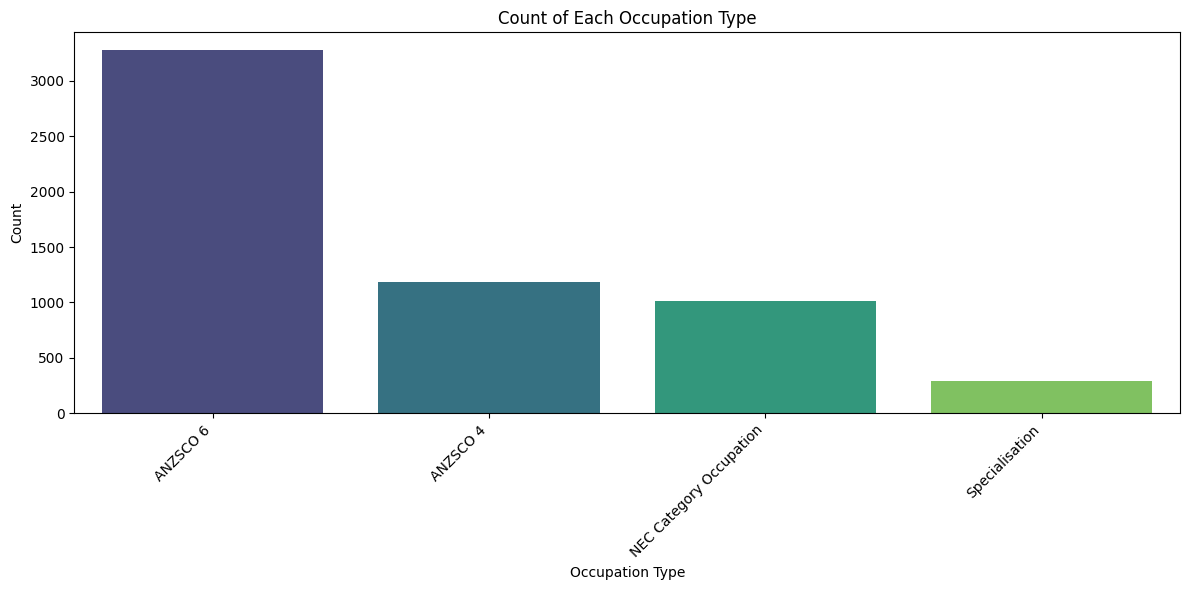

In [55]:
occupation_type_counts = tt_merged_df['Occupation Type_x'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')
plt.tight_layout()
plt.show()


Frequency job distribution was consistent with as seen in previous sections

<ipython-input-56-0edef46f8a2f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_top10, palette='viridis')


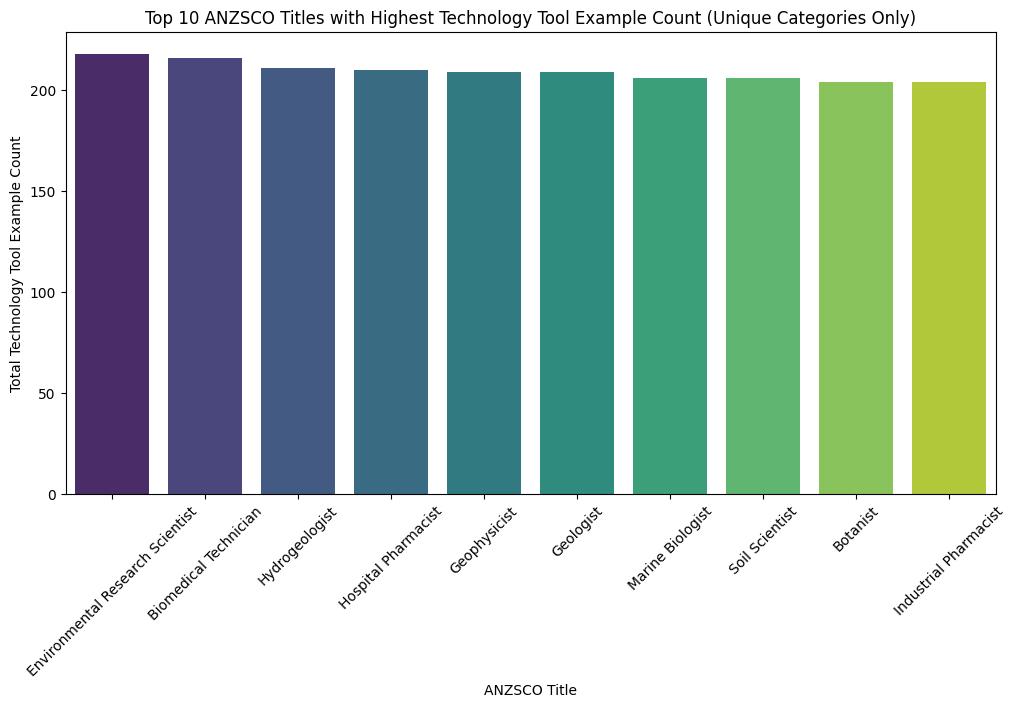

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_tools_per_title = tt_merged_df.drop_duplicates(subset=['ANZSCO Title', 'Technology Tool Category'])

anzsco_grouped = (
    unique_tools_per_title.groupby('ANZSCO Title')['Technology Tool Example Count']
    .sum()
    .reset_index()
)

anzsco_top10 = anzsco_grouped.sort_values(by='Technology Tool Example Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_top10, palette='viridis')
plt.title('Top 10 ANZSCO Titles with Highest Technology Tool Example Count (Unique Categories Only)')
plt.xlabel('ANZSCO Title')
plt.ylabel('Total Technology Tool Example Count')
plt.xticks(rotation=45)
plt.show()


On further analysis it was seen that Environmental Research Scientists and Biomedical Technicians, have a plethora (200+) of technology tools to use from.

<ipython-input-57-cc7db70a3899>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_bot10, palette='viridis')


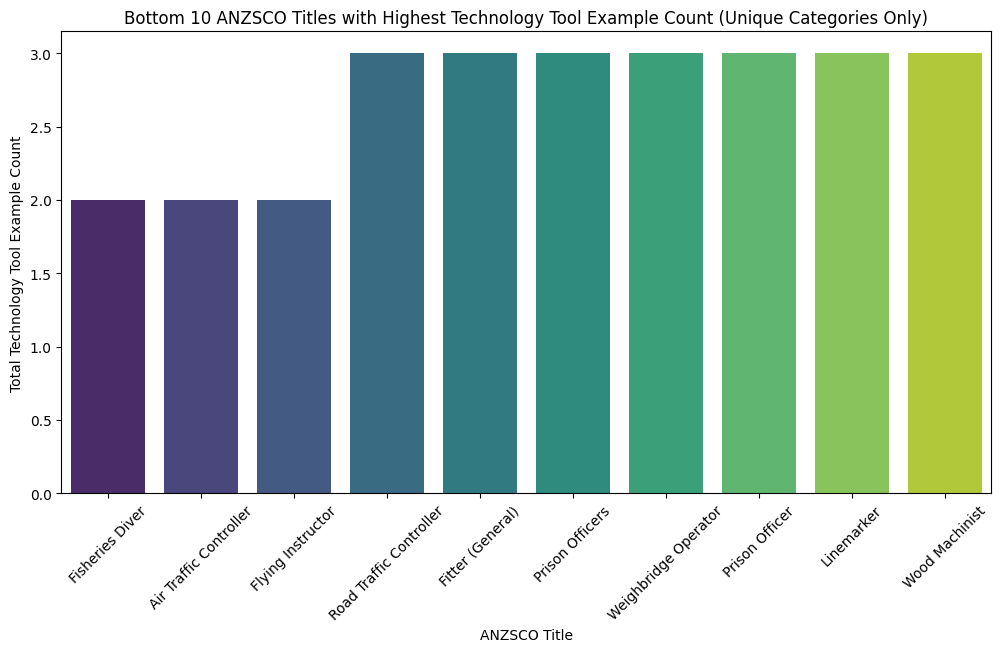

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_tools_per_title = tt_merged_df.drop_duplicates(subset=['ANZSCO Title', 'Technology Tool Category'])

anzsco_grouped = (
    unique_tools_per_title.groupby('ANZSCO Title')['Technology Tool Example Count']
    .sum()
    .reset_index()
)

anzsco_bot10 = anzsco_grouped.sort_values(by='Technology Tool Example Count', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='ANZSCO Title', y='Technology Tool Example Count', data=anzsco_bot10, palette='viridis')
plt.title('Bottom 10 ANZSCO Titles with Highest Technology Tool Example Count (Unique Categories Only)')
plt.xlabel('ANZSCO Title')
plt.ylabel('Total Technology Tool Example Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-58-a77673a28233>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="viridis")


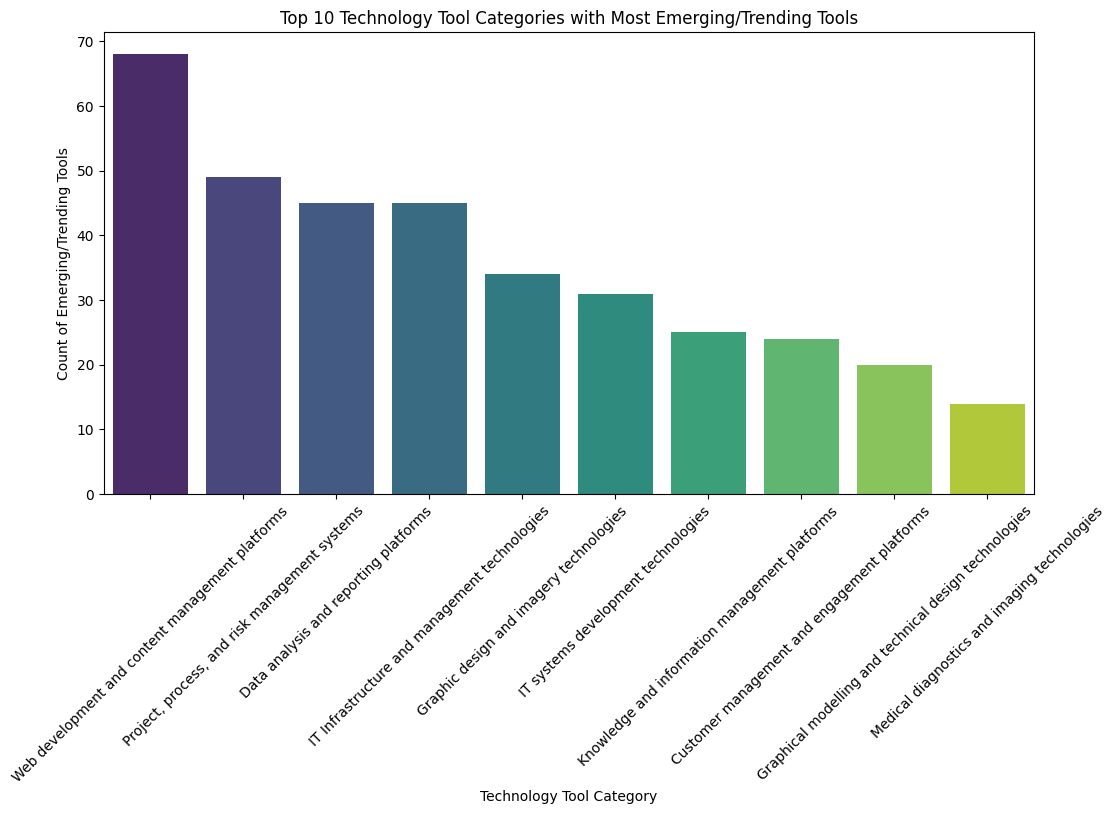

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

emerging_df = tt_merged_df[tt_merged_df['Emerging/Trending Flag'].notnull()]
category_counts = emerging_df['Technology Tool Category'].value_counts()
top_10_categories = category_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Technology Tool Category")
plt.ylabel("Count of Emerging/Trending Tools")
plt.title("Top 10 Technology Tool Categories with Most Emerging/Trending Tools")
plt.show()


Another analysis of trending tools showed that cluster of web development tools had the highest number of emerging/trending tools in the list (65+)

### **4.2.2 Specialised Task Merged Analysis**

Similar to technology tools, this merged dataset of specialist task also had a few feature duplications which were removed.

In [59]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  Specialist Cluster_y         30450 non-null  object 
 13  Cluster Family_y

In [60]:
st_merged_df = st_merged_df.rename(columns={'Emerging/\nTrending Flag': 'Emerging/Trending Flag'})
st_merged_df.drop(columns=[ "Sub-Profile Code_y", "Specialist Cluster_y", "Cluster Family_y" , "ANZSCO Code_y", "Occupation Type_y", "Skill Statement" ], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code_x', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Specialist Task', '% of time spent on task',
       'Emerging/Trending Flag', 'Specialist Cluster_x',
       ' % of time spent on cluster', 'Cluster Family_x',
       '% of time spent on family', 'Skills Statement', 'ANZSCO Description'],
      dtype='object')

In [61]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/Trending Flag       1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  ANZSCO Description           30450 non-null  object 
dtypes: float64(3), i

Columns containing on “% time spent” were missing some values, but as it was used for a basic analysis and didn’t affect the bigger NLP task in-hand, they were left as is.

In [62]:
st_merged_df.head()

Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
0          ANZSCO 4           1111                NaN   
1          ANZSCO 4           1111                NaN   
2          ANZSCO 4           1111                NaN   
3          ANZSCO 4           1111                NaN   
4          ANZSCO 4           1111                NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1  Chief Executives and Managing Directors   
2  Chief Executives and Managing Directors   
3  Chief Executives and Managing Directors   
4  Chief Executives and Managing Directors   

                                     Specialist Task  % of time spent on task  \
0  Direct or manage financial activities or opera...                   0.1302   
1     Direct department or organisational activities                   0.1117   
2  Direct sales, marketing or customer service ac...                   0.0808   
3  Communicate with others to arrange, coordinate...                   0.0665   
4  Analyse data to assess operational or project ...                   0.0651   

  Emerging/Trending Flag                               Specialist Cluster_x  \
0                    NaN  Manage, monitor and undertake financial activi...   
1               Trending               Manage services, staff or activities   
2                    NaN               Manage services, staff or activities   
3                    NaN             Communicate or collaborate with others   
4                    NaN           Use data to inform operational decisions   

    % of time spent on cluster                              Cluster Family_x  \
0                       0.1644  Business operations and financial activities   
1                       0.2128  Business operations and financial activities   
2                       0.2128  Business operations and financial activities   
3                       0.0750               Communication and collaboration   
4                       0.1009                Data, analytics, and databases   

   % of time spent on family  \
0                     0.5322   
1                     0.5322   
2                     0.5322   
3                     0.0890   
4                     0.1370   

                                    Skills Statement  \
0  Direct and oversee the financial operations of...   
1  Direct and oversee the activities of a work un...   
2  Direct and oversee the sales, marketing, or cu...   
3  Coordinate with others in order to plan, organ...   
4  Analyse qualitative and quantitative data aris...   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  Chief Executives and Managing Directors determ...  
2  Chief Executives and Managing Directors determ...  
3  Chief Executives and Managing Directors determ...  
4  Chief Executives and Managing Directors determ...

<ipython-input-63-27416d94c8cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")


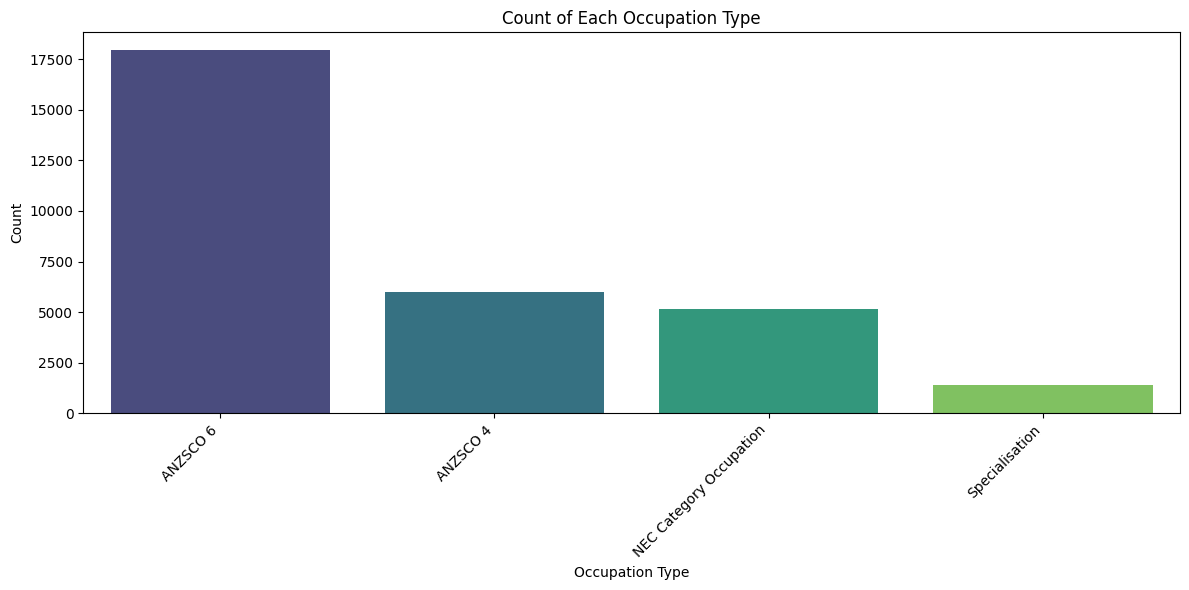

In [63]:
occupation_type_counts = st_merged_df['Occupation Type_x'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')
plt.tight_layout()
plt.show()


ANZSCO Code representation is consistent with previous sections

<ipython-input-64-d2d2df8c30bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_avg_time_spent.index, y=top_10_avg_time_spent.values, palette="viridis")


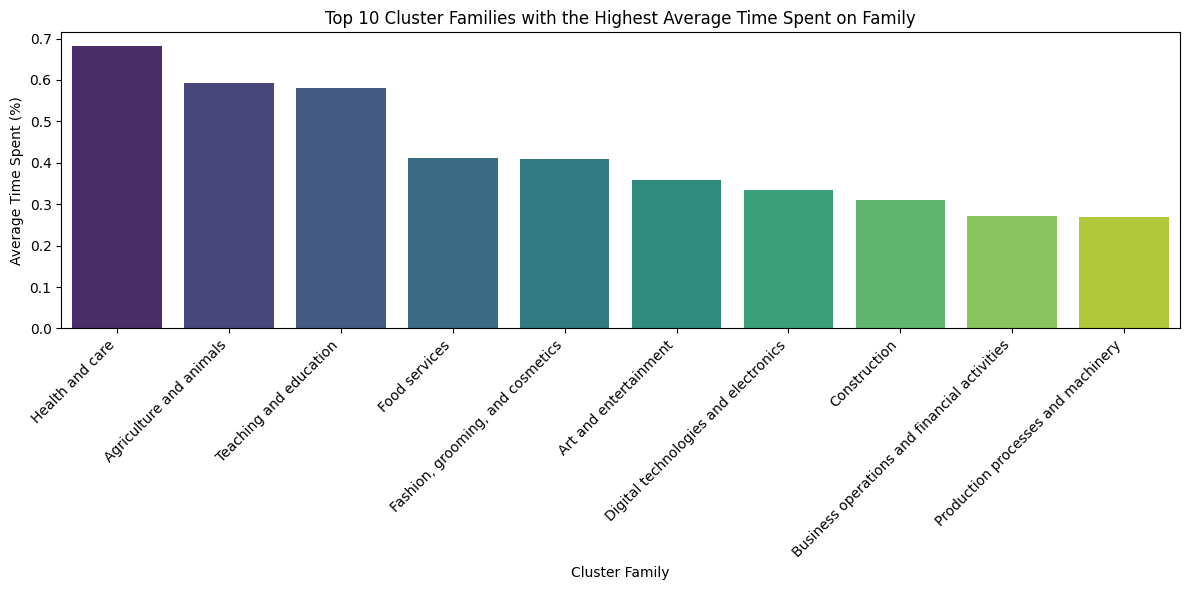

In [64]:
average_time_spent = st_merged_df.groupby('Cluster Family_x')['% of time spent on family'].mean()

top_10_avg_time_spent = average_time_spent.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_avg_time_spent.index, y=top_10_avg_time_spent.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cluster Family')
plt.ylabel('Average Time Spent (%)')
plt.title('Top 10 Cluster Families with the Highest Average Time Spent on Family')
plt.tight_layout()
plt.show()


While analysis it was found that “Health and Care” spent the most time on average for their specialist cluster families closely followed by “Agricutlure ad Animals”.

In [65]:
emerging_trending = st_merged_df[st_merged_df['Emerging/Trending Flag'].notna()]
unique_emerging_trending = emerging_trending.drop_duplicates(subset=['Specialist Task', 'Cluster Family_x'])
emerging_trending_counts = unique_emerging_trending.groupby('Cluster Family_x')['Emerging/Trending Flag'].count()
top_10_emerging_trending = emerging_trending_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_emerging_trending.index, y=top_10_emerging_trending.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Unique Emerging/Trending Specialist Tasks')
plt.title('Top 10 Cluster Families with the Most Unique Emerging/Trending Specialist Tasks')
plt.tight_layout()
plt.show()


<ipython-input-65-76d2cd555083>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_emerging_trending.index, y=top_10_emerging_trending.values, palette="viridis")


Business Operations and Digital Technologies were the top 2 cluster families with most emerging/trending tasks in them

### **4.2.3 Core Competencies Merged Analysis**

A similar process was followed as the last two categories and duplicating features were dropped.

In [66]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

With only sub-profile code showing 0 records, this was later verified, as there was only 2 occupation types ANZSCO 4 and ANZSCO 6 which historically did not have any sub-profile codes [Section 3.2.2](#section-322)

In [67]:
cc_merged_df.drop(columns=[ "Sub-Profile Code_y" , "Occupation Type_y"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description',
       'Proficiency Level_desc', 'Anchor Value_desc'],
      dtype='object')

In [68]:
cc_merged_df.drop(columns=[ "Anchor Value_desc" , "Proficiency Level_desc"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description'],
      dtype='object')

In [69]:
cc_merged_df.head()

Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      Intermediate   
4         Oral communication      7      Intermediate   

                                        Anchor Value  \
0  Build and maintain an effective online profile...   
1  Negotiate a price and sales terms then prepare...   
2  Learn a new filing system that groups document...   
3  Use a blood pressure machine and accurately re...   
4  Participate in a work meeting and ask appropri...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Assists Aboriginal and Torres Strait Islander ...   
2  Assists Aboriginal and Torres Strait Islander ...   
3  Assists Aboriginal and Torres Strait Islander ...   
4  Assists Aboriginal and Torres Strait Islander ...   

                         Core Competency Description  
0  Identifying and using technology (including ha...  
1  Taking on responsibilities and challenges, bei...  
2  Understanding the implications of new informat...  
3  Using mathematics to solve problems and interp...  
4  The ability to communicate information and ide...

<ipython-input-70-be3cd5a25e21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")


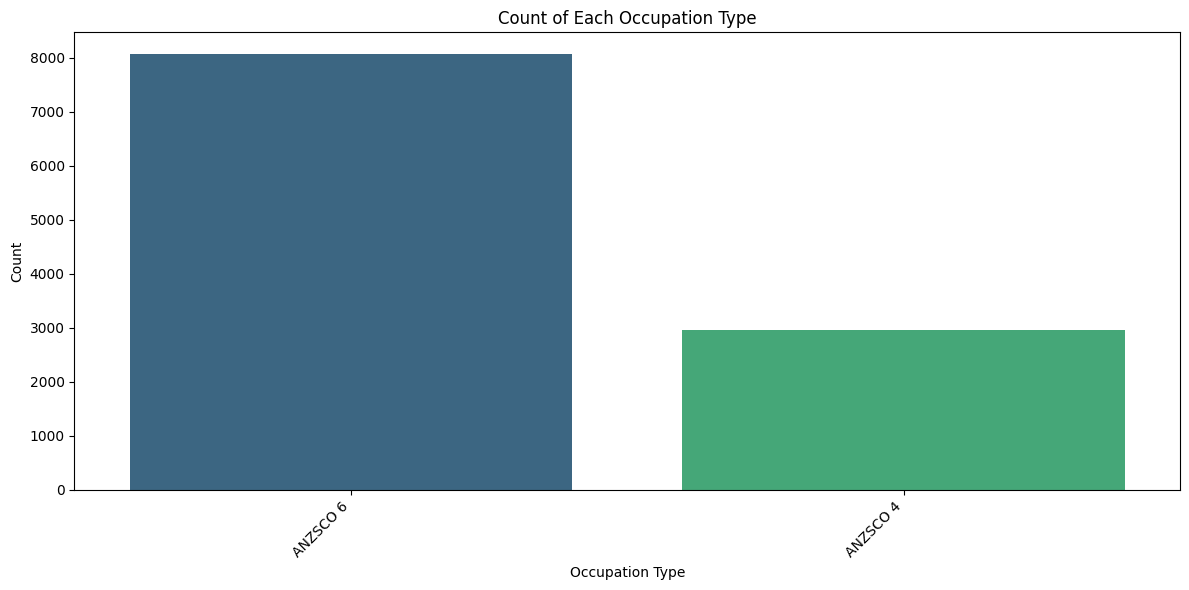

In [70]:
occupation_type_counts = cc_merged_df['Occupation Type_x'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_type_counts.index, y=occupation_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')
plt.tight_layout()
plt.show()


The Disctribution of Occupation types is similar to previous analysis. [Section 3.2.2](#section-322)

<ipython-input-71-33e6bf344b71>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_anzsco.index, y=top_10_anzsco.values, palette="viridis")


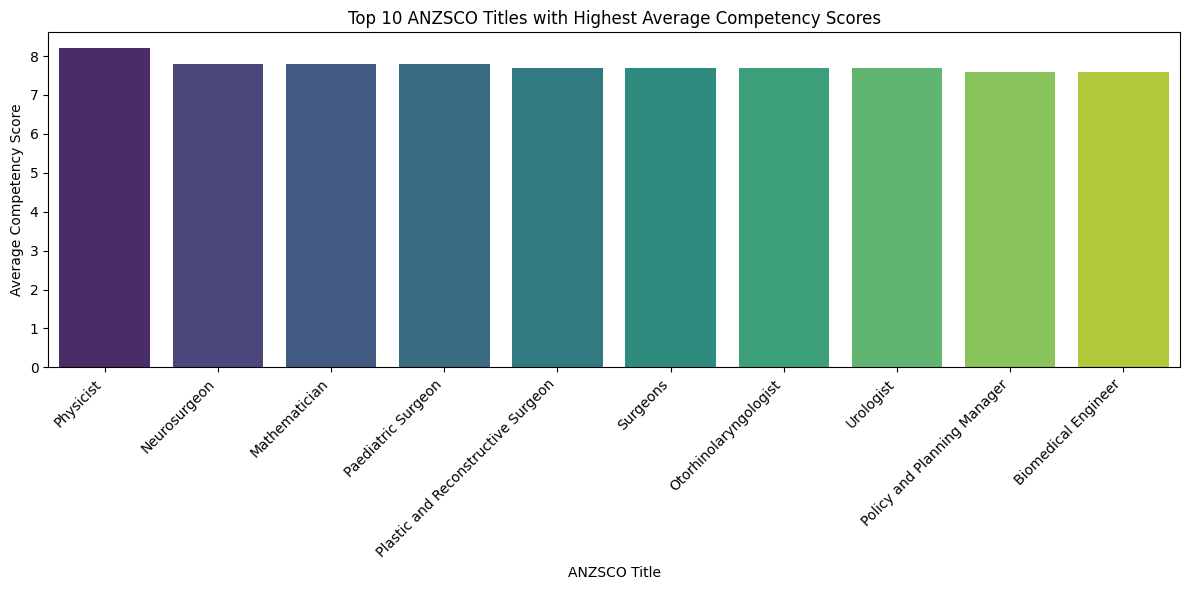

In [71]:
average_scores_by_anzsco = cc_merged_df.groupby('ANZSCO Title')['Score'].mean()

top_10_anzsco = average_scores_by_anzsco.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_anzsco.index, y=top_10_anzsco.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('ANZSCO Title')
plt.ylabel('Average Competency Score')
plt.title('Top 10 ANZSCO Titles with Highest Average Competency Scores')
plt.tight_layout()
plt.show()


<ipython-input-72-03498f812322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_anzsco.index, y=top_10_anzsco.values, palette="viridis")


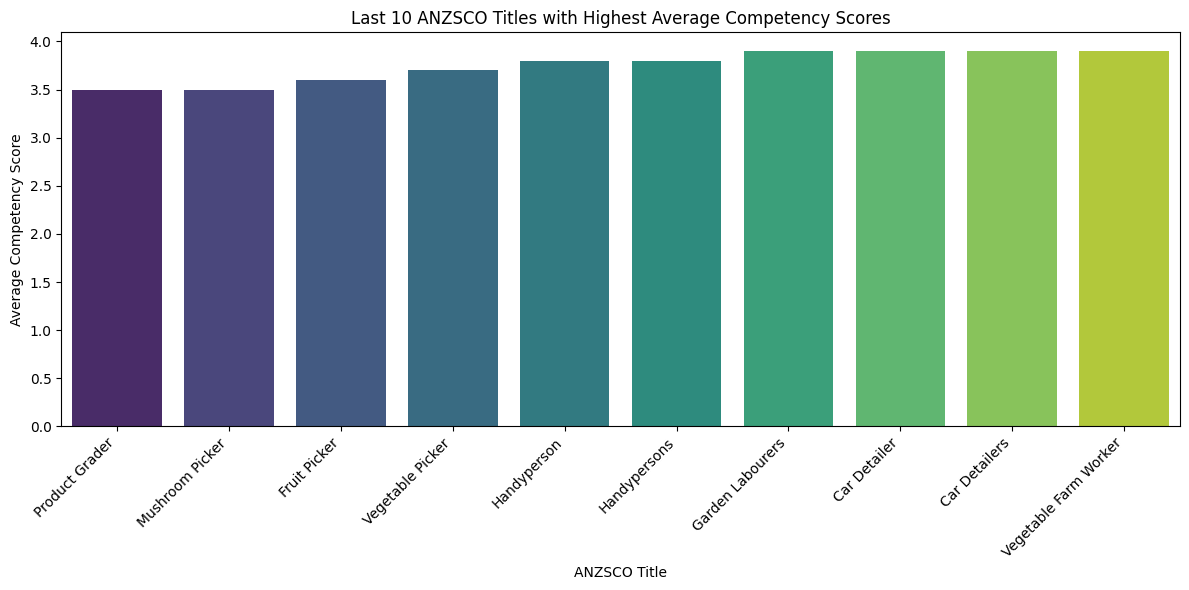

In [72]:
average_scores_by_anzsco = cc_merged_df.groupby('ANZSCO Title')['Score'].mean()
top_10_anzsco = average_scores_by_anzsco.sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_anzsco.index, y=top_10_anzsco.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('ANZSCO Title')
plt.ylabel('Average Competency Score')
plt.title('Last 10 ANZSCO Titles with Highest Average Competency Scores')
plt.tight_layout()
plt.show()


On analysis it was seen that Physisicts followed by Neurosurgeon had the highest core competencies on average making them the highest professions when classed by basic skills, while Product Grader and Mushroom Pickers require the least core competency scores.

# **5. NLP Pipeline**

## 5.1 Research Question 1
Can similar occupations be clustered based on their core competency descriptions to assist users in finding related jobs?

This question was answered using the Core Competency Merged Dataframe.

### 5.1.1 NLP based Data Preparation and Analysis


The initial step involved doing some basic NLP based data analysis to understand how Core Competency Descriptions were represented as it was textual data.

In [73]:
cc_nlp = cc_merged_df.copy()

In [74]:
cc_nlp.head()

Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      Intermediate   
4         Oral communication      7      Intermediate   

                                        Anchor Value  \
0  Build and maintain an effective online profile...   
1  Negotiate a price and sales terms then prepare...   
2  Learn a new filing system that groups document...   
3  Use a blood pressure machine and accurately re...   
4  Participate in a work meeting and ask appropri...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Assists Aboriginal and Torres Strait Islander ...   
2  Assists Aboriginal and Torres Strait Islander ...   
3  Assists Aboriginal and Torres Strait Islander ...   
4  Assists Aboriginal and Torres Strait Islander ...   

                         Core Competency Description  
0  Identifying and using technology (including ha...  
1  Taking on responsibilities and challenges, bei...  
2  Understanding the implications of new informat...  
3  Using mathematics to solve problems and interp...  
4  The ability to communicate information and ide...

1. The dataset was aggregated based on occupation titles (ANZSCO Title) to work in a clear direction for the defined goal. This meant that Anchor Value (Core Competency descriptions) were merged as one forming one document for each job.

In [75]:
cc_nlp_2 = cc_nlp.groupby('ANZSCO Title').agg(
    {
        'Occupation Type_x': 'first',
        'ANZSCO Code': 'first',
        'Sub-Profile Code_x': 'first',
        'Anchor Value': ' '.join,
        'ANZSCO Description': 'first'
    }
).reset_index()

cc_nlp_2.rename(columns={'Anchor Value': 'Anchor Value Merged'}, inplace=True)
print(cc_nlp_2.head())


                                        ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to docume

2. All the text in the Anchor Value Column ( Description for individual levels of core competencies) were cleaned by removing trailing and leading whitespace, removing digits, punctuations, extra symbols and multiple spaces were replaced with a single space.

In [76]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower().strip()
    return text

cc_nlp_2['Anchor Value Clean'] = cc_nlp_2['Anchor Value Merged'].apply(clean_text)
cc_nlp_2.head()


ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to document ...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Liaises with patients, clients, visitors to ho...   
2  Provides services relating to compliance-based...   
3  Accountants provide services relating to finan...   
4  Accounting Clerks monitor creditor and debtor ...   

                                  Anchor Value Clean  
0  build and maintain an effective online profile...  
1  use software on a portable device to document ...  
2  write software for keeping track of items in a...  
3  write software for keeping track of items in a...  
4  use software on a portable device to document ...

3. Tokenization

In [77]:
w_stopword_tokens = cc_nlp_2['Anchor Value Clean'].apply(word_tokenize)

In [78]:
w_stopword_tokens.head()

0    [build, and, maintain, an, effective, online, ...
1    [use, software, on, a, portable, device, to, d...
2    [write, software, for, keeping, track, of, ite...
3    [write, software, for, keeping, track, of, ite...
4    [use, software, on, a, portable, device, to, d...
Name: Anchor Value Clean, dtype: object

Lemmatization is performed to maintain linguistic accuracy and preserve meaning as our task (identifying topics) benefited from this process. Although lemmatization is more computationally expensive, the dataset was relatively small, making the performance difference negligible.

In [81]:
lemmatizer = WordNetLemmatizer()
lemmatized_stop_values = w_stopword_tokens.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print(lemmatized_stop_values.head())


0    [build, and, maintain, an, effective, online, ...
1    [use, software, on, a, portable, device, to, d...
2    [write, software, for, keeping, track, of, ite...
3    [write, software, for, keeping, track, of, ite...
4    [use, software, on, a, portable, device, to, d...
Name: Anchor Value Clean, dtype: object


In [82]:
lemmatized_tokens = w_stopword_tokens.explode()
lemmatized_tokens_series = pd.Series(lemmatized_tokens)

print("Tokenized Tokens Summary:")
print(lemmatized_tokens_series.describe())


Tokenized Tokens Summary:
count     131823
unique       489
top            a
freq       11711
Name: Anchor Value Clean, dtype: object


In [83]:
all_words = [word for words in lemmatized_stop_values for word in words]
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


<ipython-input-83-01677c19c74d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


It is observed that there were 131823 total tokens but only 489 which meant there were a lot of repetitions. The top token was “a” which is an article thus will cause a problem while performing NLP analysis. To further solidify this, a bar plot was plotted to check and 7 out of the top 8 most frequent words were articles or prepositions which were not needed

<ipython-input-84-ab4ab0a611f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


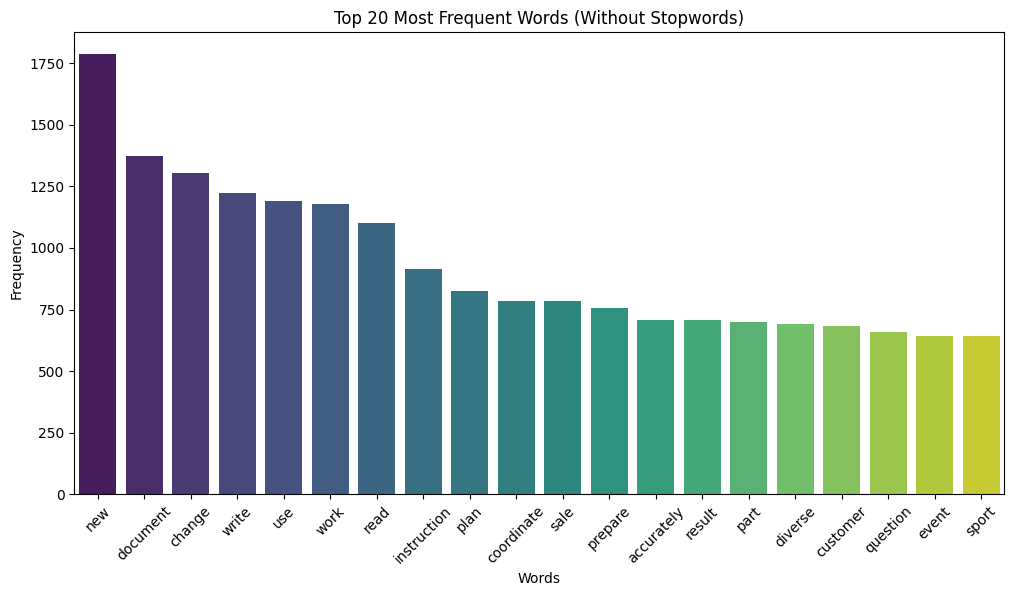

In [84]:
stop_words = set(stopwords.words('english'))

filtered_words = [[word for word in words if word.lower() not in stop_words] for words in lemmatized_stop_values]
all_words_filtered = [word for words in filtered_words for word in words]

word_freq_filtered = Counter(all_words_filtered)

top_words_filtered = word_freq_filtered.most_common(20)
words, counts = zip(*top_words_filtered)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words (Without Stopwords)")
plt.show()


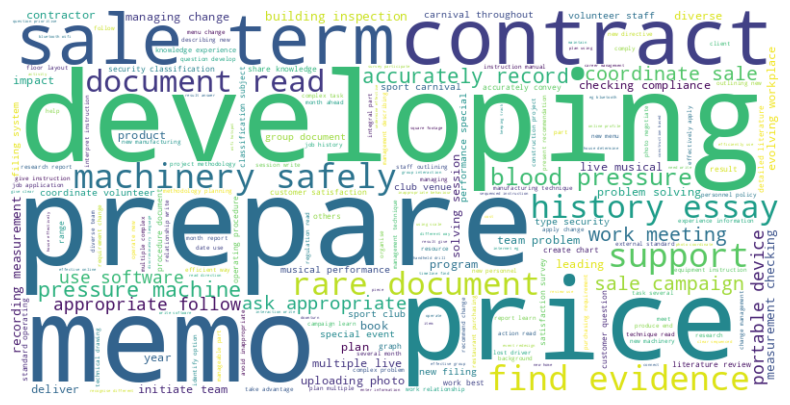

In [85]:
from wordcloud import WordCloud
lemmatized_text = ' '.join([' '.join(words) for words in lemmatized_stop_values])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


In [86]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")
print(f"3. {' '.join(filtered_words[2])}")

Lemmatized data:
1. build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
2. use software portable device document building inspection recording measurement checking compliance uploading photo negotiate price sale term prepare contract house effectively apply change management technique managing diverse team use blood pressure machine accurately re

In [87]:
stop_words = set(stopwords.words('english'))

lemmatized_clean_values = lemmatized_stop_values.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)
print(lemmatized_clean_values.head())


0    [build, maintain, effective, online, profile, ...
1    [use, software, portable, device, document, bu...
2    [write, software, keeping, track, item, invent...
3    [write, software, keeping, track, item, invent...
4    [use, software, portable, device, document, bu...
Name: Anchor Value Clean, dtype: object


In [88]:
lemmatized_clean_values1 = lemmatized_clean_values.explode()
lemmatized_clean_ser = pd.Series(lemmatized_clean_values1)

print("Tokenized Tokens Summary:")
print(lemmatized_clean_ser.describe())


Tokenized Tokens Summary:
count     87432
unique      428
top         new
freq       1786
Name: Anchor Value Clean, dtype: object


Stopwords were removed and a another bar plot was drawn to visualise the true frequency of words. It was also seen that the token count reduced to 87432 tokens and 429 unique tokens

In [90]:
from nltk.util import ngrams
filtered_words_flat = [word for words in filtered_words for word in words]

bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")


🔹 Top 20 Bigrams:
negotiate price: 402
price sale: 402
sale term: 402
term prepare: 402
prepare contract: 402
contract house: 402
machinery safely: 396
find evidence: 391
evidence support: 391
support history: 391
history essay: 391
essay rare: 391
rare document: 391
document read: 391
use blood: 389
blood pressure: 389
pressure machine: 389
machine accurately: 389
accurately record: 389
record result: 389

🔹 Top 20 Trigrams:
negotiate price sale: 402
price sale term: 402
sale term prepare: 402
term prepare contract: 402
prepare contract house: 402
find evidence support: 391
evidence support history: 391
support history essay: 391
history essay rare: 391
essay rare document: 391
rare document read: 391
use blood pressure: 389
blood pressure machine: 389
pressure machine accurately: 389
machine accurately record: 389
accurately record result: 389
coordinate sale campaign: 381
participate work meeting: 377
work meeting ask: 377
meeting ask appropriate: 377


<ipython-input-91-3d8090d4b079>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


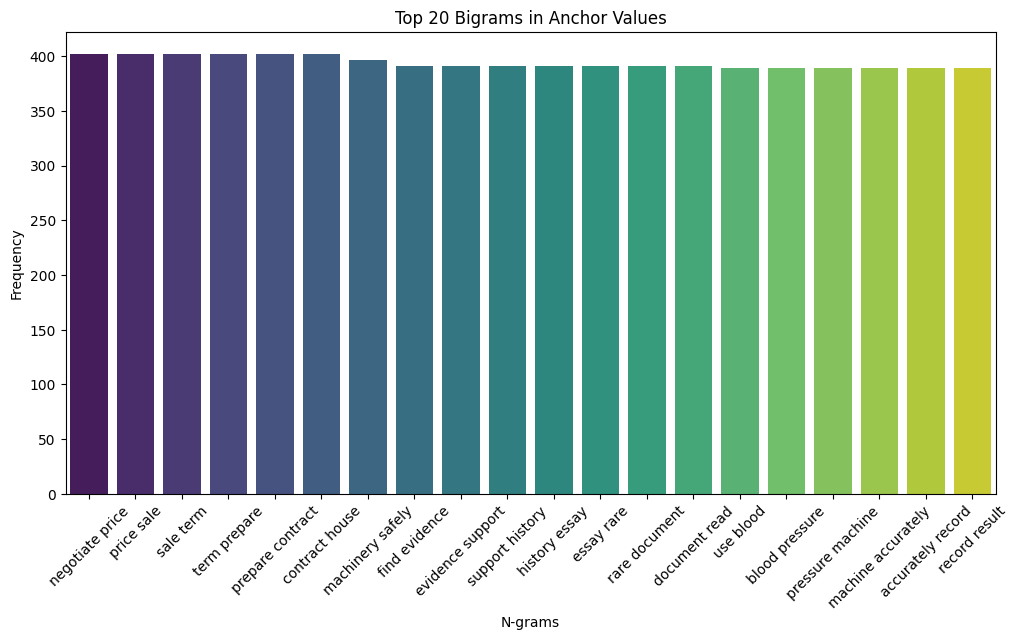

In [91]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")



<ipython-input-91-3d8090d4b079>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


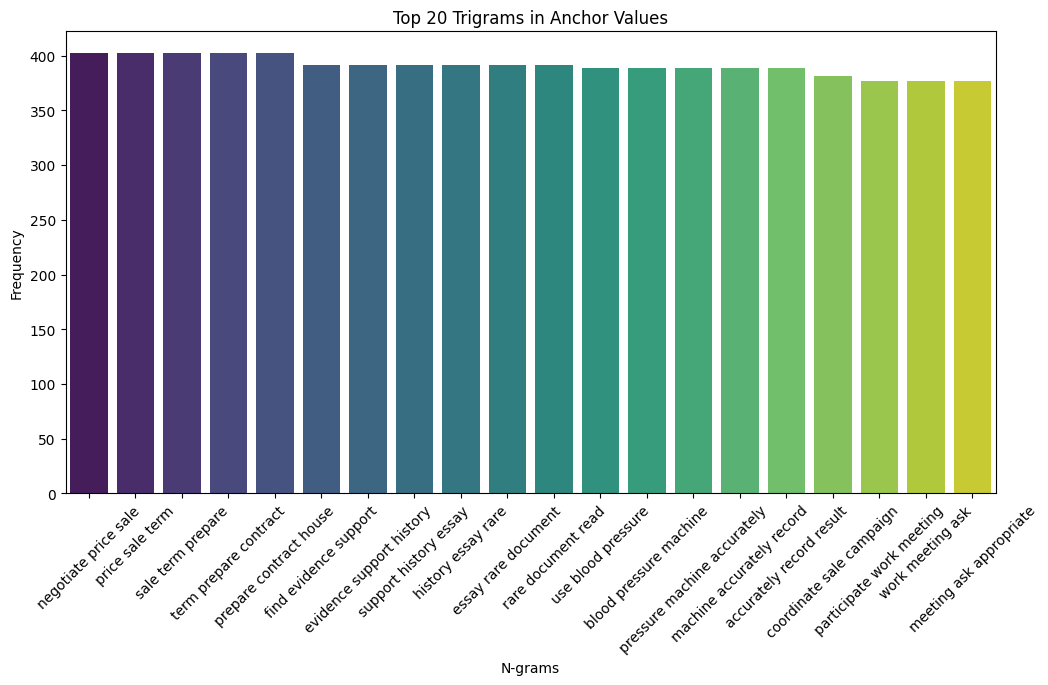

In [92]:
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")

Bigram and Trigram analysis was conducted and it was seen that they were interlinked as the bigram and trigram plots showed similar word sequences. This shows limited variation in document structure and lacks new patterns. The document is highly structured thus this makes sense

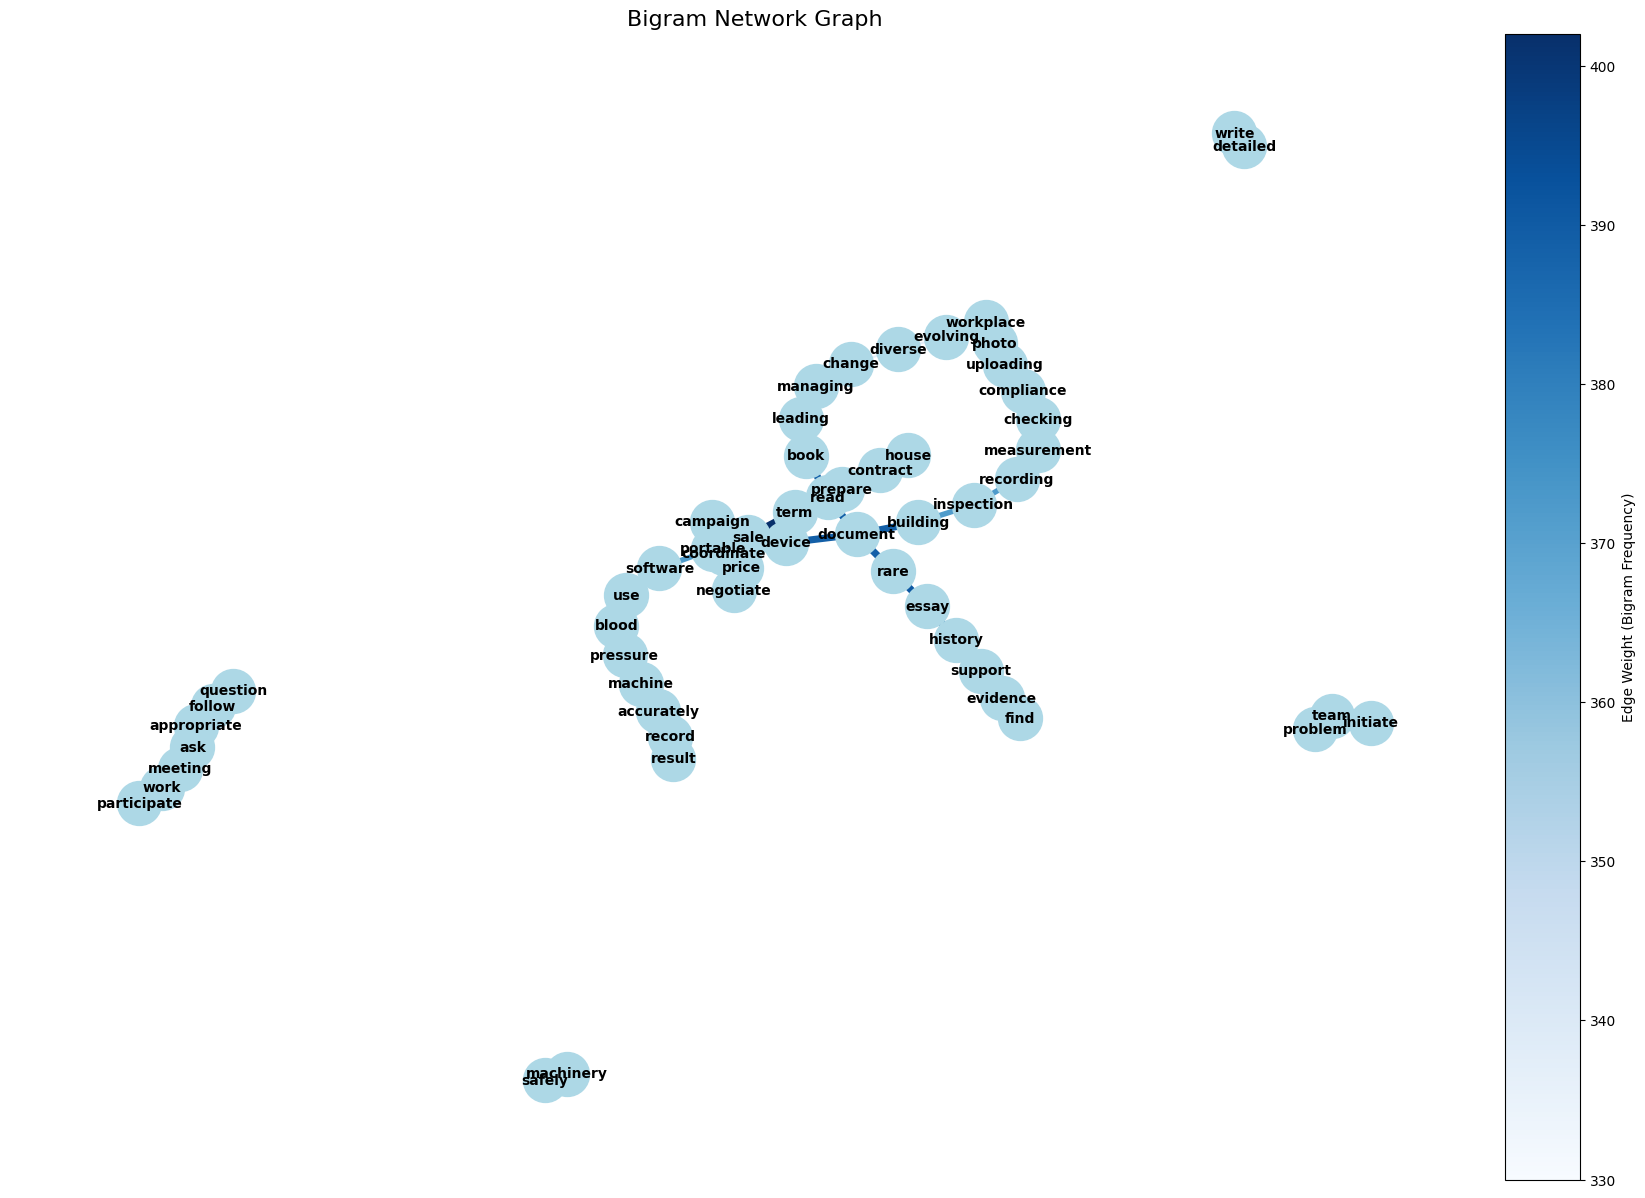

In [93]:
from nltk.util import bigrams
import networkx as nx
from mpl_toolkits.axes_grid1 import make_axes_locatable

all_words = [word for words in lemmatized_clean_values for word in words]

def plot_bigram_network(words, n=50):
    if not words:
        print("No words found. Ensure that 'lemmatized_anchor_values' contains data.")
        return
    bigram_freq = Counter(bigrams(words))
    G = nx.Graph()
    edge_width = []
    edge_color = []

    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)

    if edge_width:
        edge_width = np.array(edge_width, dtype=float)
        if edge_width.max() > edge_width.min():
            edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())
        else:
            edge_width = np.full_like(edge_width, 3)

    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    if edge_color:
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.05)
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)

    plt.show()

plot_bigram_network(all_words)


A bigram network graph was visualised that showed a variety of different bonds where certain words like “write-detailed”, “machinery-safety” tend to occur together and formed a strong connection

In [94]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")

Lemmatized data:
1. build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
2. use software portable device document building inspection recording measurement checking compliance uploading photo negotiate price sale term prepare contract house effectively apply change management technique managing diverse team use blood pressure machine accurately re

### **5.1.2 Latent Dirichlet Allocation (LDA)**

#### 5.1.2.1 LDA Using Bag of Words

This was performed using the Gensim library

A bag of words approach was initially experimented with as it was interpretable and would help capture the common most frequent terms.
The LDA model was created using the Gensim library

In [125]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [126]:
from gensim.corpora import Dictionary

dictionary = Dictionary(lemmatized_clean_values)
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
accurately => 0
achieve => 1
appropriate => 2
ask => 3
blood => 4


In [127]:
corpus = [dictionary.doc2bow(text) for text in lemmatized_clean_values]

print(f"Text: {' '.join(filtered_words[0])}")
print(f"Corpus: {corpus[0]}")

Text: build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
Corpus: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32

10 topics to help group the core similar jobs in the dataset.

In [128]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(
   corpus=corpus, id2word=dictionary, num_topics=10,
   random_state=100, update_every=1, chunksize=100,
   passes=10, alpha='auto', per_word_topics=True
)

In [129]:
lda_model.save("lda_model")
del lda_model

In [130]:
lda_model = LdaModel.load("lda_model") # Load it by passing the name

pyLDAvis library is required to visualise an interactive plot for interpretable results

In [131]:
!pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.9 MB/s eta 0:00:00


In [132]:
import pyLDAvis
from pyLDAvis.gensim import prepare
pyLDAvis.enable_notebook()

pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [133]:
pyLDAvis.display(pyLDAvis_data)

We can see a clear distinction between some topics as Topic 4 showcased a topic which is more inclined towards event management whereas topic 1 showcased a stronger topic association with documentation and writing.

But topics 3 and 8 are massively interlinking, which might be bad modelling

##### **5.1.2.1.1 Evaluation**

For LDA evaluation, we use Perplxity Score and Coherence

Perplexity measures how well a probabilistic model predicts a given dataset. In LDA, it helps assess how well the trained model can generalize to unseen data.

1. Lower perplexity : Better generalization, meaning the model fits the data well.
2. Higher perplexity : Poor generalization, meaning the model does not fit the data properly.


Coherence Score evaluates the semantic similarity between the top words in a topic, determining how interpretable and meaningful the extracted topics are.

1. Higher coherence score : Topics are more meaningful and interpretable.
2. Lower coherence score : Topics are less meaningful and harder to interpret.

In [134]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_clean_values, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("LDA Model Coherence Score:", coherence_score)


LDA Model Coherence Score: 0.7683700120545156


In [135]:
from gensim.models import LdaModel

perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")


Perplexity: -5.04180956588882


The perplexity score is quite low and the coherence score is high indicating a strong model, but as an extra precaution we will also do an extrinsic evaluation

As one of our main goals is to find jobs similar to "Data Scientists" we will filter the output accordingly

In [136]:
dominant_topics = [max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0] for tokens in lemmatized_clean_values]
cc_lda = cc_nlp_2.copy()
cc_lda['Dominant Topic'] = dominant_topics

filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]
print(filtered_data[['ANZSCO Title', 'Dominant Topic']].head(30))


               ANZSCO Title  Dominant Topic
241            Data Analyst               6
243          Data Scientist               6
244  Database Administrator               6


In [137]:
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Deer Farmer', 'Goat Farmer'])]
print(filtered_data[['ANZSCO Title', 'Dominant Topic']].head(30))

    ANZSCO Title  Dominant Topic
249  Deer Farmer               6
427  Goat Farmer               6


Although the model is able to find similar topics behind the core comptenecies required for similar jobs like Data Scientist and Data Analyst, it is also giving similar competencies topics to Deer and Goat Farmers

This showcases that although the intrinsic evaluation metrics might be quite good, an extrinsic evaluation is necessary

In [138]:
data_scientist_topic = cc_lda[cc_lda['ANZSCO Title'] == 'Data Scientist']['Dominant Topic'].values[0]
same_topic_jobs = cc_lda[cc_lda['Dominant Topic'] == data_scientist_topic]


In [139]:
same_topic_jobs.head(273)

ANZSCO Title Occupation Type_x  \
1     Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                                  Accountant (General)          ANZSCO 6   
3                                           Accountants          ANZSCO 4   
8                                         Acupuncturist          ANZSCO 6   
11                               Advertising Specialist          ANZSCO 6   
...                                                 ...               ...   
1078                                      Web Developer          ANZSCO 6   
1082                             Welfare Centre Manager          ANZSCO 6   
1084                                     Welfare Worker          ANZSCO 6   
1085     Welfare, Recreation and Community Arts Workers          ANZSCO 4   
1097                        Workplace Relations Adviser          ANZSCO 6   

      ANZSCO Code  Sub-Profile Code_x  \
1          411511                 NaN   
2          221111                 NaN   
3            2211                 NaN   
8          252211                 NaN   
11         225111                 NaN   
...           ...                 ...   
1078       261212                 NaN   
1082       134214                 NaN   
1084       272613                 NaN   
1085         2726                 NaN   
1097       223113                 NaN   

                                    Anchor Value Merged  \
1     Use software on a portable device to document ...   
2     Write software for keeping track of items in a...   
3     Write software for keeping track of items in a...   
8     Enter information into a database Negotiate a ...   
11    Use software on a portable device to document ...   
...                                                 ...   
1078  Use Enterprise Resource Planning software to m...   
1082  Use software on a portable device to document ...   
1084  Use software on a portable device to document ...   
1085  Use software on a portable device to document ...   
1097  Use software on a portable device to document ...   

                                     ANZSCO Description  \
1     Liaises with patients, clients, visitors to ho...   
2     Provides services relating to compliance-based...   
3     Accountants provide services relating to finan...   
8     Treats disorders and illnesses by stimulating ...   
11    Devises and coordinates advertising campaigns ...   
...                                                 ...   
1078  Plans, produces and maintains websites using w...   
1082  Plans, organises, directs, controls and coordi...   
1084  Assists individuals, families and groups with ...   
1085  Welfare, Recreation and Community Arts Workers...   
1097  Assists in resolving disputes by advising on w...   

                                     Anchor Value Clean  Dominant Topic  
1     use software on a portable device to document ...               6  
2     write software for keeping track of items in a...               6  
3     write software for keeping track of items in a...               6  
8     enter information into a database negotiate a ...               6  
11    use software on a portable device to document ...               6  
...                                                 ...             ...  
1078  use enterprise resource planning software to m...               6  
1082  use software on a portable device to document ...               6  
1084  use software on a portable device to document ...               6  
1085  use software on a portable device to document ...               6  
1097  use software on a portable device to document ...               6  

[273 rows x 8 columns]

In [140]:
same_topic_jobs[['ANZSCO Title', 'Dominant Topic', 'Dominant Topic']].to_excel('CC_LDA_Jobs_exp1.xlsx', index=False)


This filtered file is exported to check it manually in detail

#### **5.1.2.2 LDA Using TFIDF (Term Frequency – Inverse Document Frequency)**

Another approach TF-IDF was tried as it tends to give importance to rare occurring meaningful words. This would help focus on terms that are competency specific.

This LDA approach was also done using 10 topics and as seen the top words plotted for different topics along with their weights.

It is then assigning these Documents into different topics along with the jobs to understand if different core competencies based on their levels will be able to find similar jobs or occupations


Topics:
Topic: 0 
Words: 0.008*"developing" + 0.008*"research" + 0.007*"job" + 0.006*"event" + 0.006*"sport" + 0.006*"memo" + 0.006*"instruction" + 0.006*"safely" + 0.006*"machinery" + 0.006*"operate"

Topic: 1 
Words: 0.013*"developing" + 0.012*"research" + 0.009*"document" + 0.008*"security" + 0.008*"date" + 0.008*"classification" + 0.008*"type" + 0.008*"filing" + 0.008*"subject" + 0.008*"instruction"

Topic: 2 
Words: 0.010*"sport" + 0.010*"event" + 0.007*"technique" + 0.007*"diverse" + 0.007*"managing" + 0.006*"checking" + 0.006*"measurement" + 0.006*"portable" + 0.006*"uploading" + 0.006*"building"

Topic: 3 
Words: 0.009*"developing" + 0.009*"research" + 0.007*"job" + 0.006*"memo" + 0.006*"sport" + 0.006*"event" + 0.006*"machinery" + 0.006*"operate" + 0.006*"safely" + 0.006*"way"

Topic: 4 
Words: 0.009*"developing" + 0.009*"research" + 0.007*"job" + 0.007*"event" + 0.007*"sport" + 0.006*"detailed" + 0.006*"managing" + 0.005*"construction" + 0.005*"instruction" + 0.005*"impact"



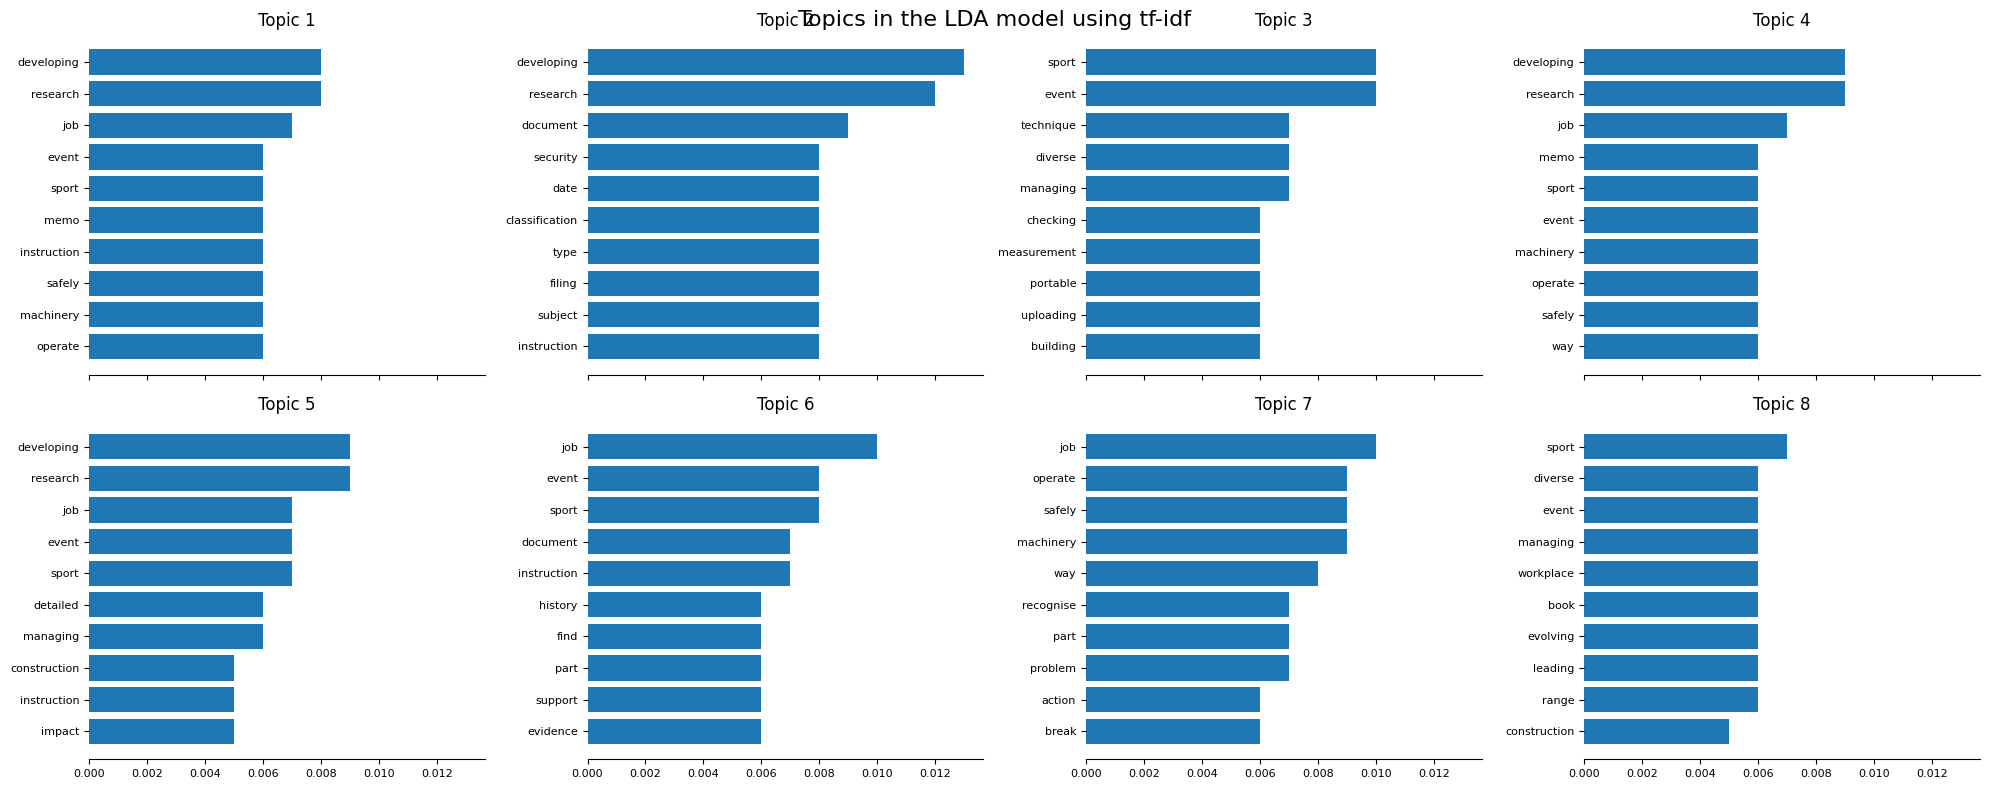

In [141]:
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
import math

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

num_topics = 10
lda_model = LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=8, random_state=42)

print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

def plot_top_words(model, feature_names, n_top_words, title):
    num_topics = len(model.print_topics(-1))

    num_cols = min(4, num_topics)
    num_rows = math.ceil(num_topics / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), sharex=True)
    axes = axes.flatten() if num_topics > 1 else [axes]

    for topic_idx, topic in model.print_topics(-1):
        words_weights = re.findall(r'(0\.\d+)\*"(.+?)"', topic)

        if words_weights:
            weights, words = zip(*words_weights)
            weights = [float(w) for w in weights]
        else:
            print(f"No matches found for topic {topic_idx}")
            continue

        ax = axes[topic_idx]
        ax.barh(words[:n_top_words], weights[:n_top_words])
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    for idx in range(num_topics, len(axes)):
        axes[idx].set_visible(False)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

plot_top_words(lda_model, dictionary.values(), n_top_words=10, title='Topics in the LDA model using tf-idf')

def format_topics_sentences(ldamodel, corpus):
    topics_df = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break

    return pd.DataFrame(topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf)
df_dominant_topic = pd.concat([df_topic_sents_keywords, cc_nlp_2.reset_index()], axis=1)


##### 5.1.2.2.1 Evaluation

In [142]:
df_dominant_topic.head()

Dominant_Topic  Perc_Contribution  \
0               2             0.4611   
1               2             0.8980   
2               2             0.8957   
3               2             0.8957   
4               1             0.9000   

                                      Topic_Keywords  index  \
0  sport, event, technique, diverse, managing, ch...      0   
1  sport, event, technique, diverse, managing, ch...      1   
2  sport, event, technique, diverse, managing, ch...      2   
3  sport, event, technique, diverse, managing, ch...      3   
4  developing, research, document, security, date...      4   

                                        ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to document ...   

                                  ANZSCO Description  \
0  Assists Aboriginal and Torres Strait Islander ...   
1  Liaises with patients, clients, visitors to ho...   
2  Provides services relating to compliance-based...   
3  Accountants provide services relating to finan...   
4  Accounting Clerks monitor creditor and debtor ...   

                                  Anchor Value Clean  
0  build and maintain an effective online profile...  
1  use software on a portable device to document ...  
2  write software for keeping track of items in a...  
3  write software for keeping track of items in a...  
4  use software on a portable device to document ...

In [143]:
data_scientist_topic = df_dominant_topic[df_dominant_topic['ANZSCO Title'] == 'Data Scientist']['Dominant_Topic'].values[0]

same_topic_jobs_tf = df_dominant_topic[df_dominant_topic['Dominant_Topic'] == data_scientist_topic]

In [144]:
same_topic_jobs_tf[['ANZSCO Title', 'Dominant_Topic']].head(119)

ANZSCO Title  Dominant_Topic
7                                             Actuary               4
14                                    Aeroplane Pilot               4
17                            Agricultural Consultant               4
19                    Agricultural Research Scientist               4
23    Agricultural, Fisheries and Forestry Scientists               4
...                                               ...             ...
981                                          Surveyor               4
1020        Traditional Chinese Medicine Practitioner               4
1039                  University Lecturers and Tutors               4
1043                       Urban and Regional Planner               4
1100                                        Zoologist               4

[119 rows x 2 columns]

In [145]:
same_topic_jobs[['ANZSCO Title', 'Dominant Topic']].to_excel('CC_TFIDF_Jobs.xlsx', index=False)


In [146]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_clean_values, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("LDA Model Coherence Score:", coherence_score)

perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")



LDA Model Coherence Score: 0.5684951881634328
Perplexity: -5.815538946125697


Coherence and Perplexity Scores for this model are also appreciable, but as mentioned in [section 5.1.2.1.1](#51211) an extrinsic evaluation will also take place to justify which method is better.


## 5.2 Research Question 2

Can similar occupations be clustered based on their technology tools descriptions to assist users in finding related jobs?

This research question was answered using the technology tools merged dataframe.

### 5.2.1 NLP based Data Preparation and Analysis

In [147]:
tt_nlp = tt_merged_df.copy()

In [148]:
tt_nlp.head()

Technology Tool Category  \
2137  Geographical guidance and navigation technologies   
1842  Geographical guidance and navigation technologies   
1950  Geographical guidance and navigation technologies   
3687             Logistics and fleet management systems   
4195    Payroll and human resource management platforms   

                   Technology Tool Category Description  \
2137  Systems for real-time navigation, mapping and ...   
1842  Systems for real-time navigation, mapping and ...   
1950  Systems for real-time navigation, mapping and ...   
3687  Systems for logistics, vehicle despatch, and f...   
4195  Systems to undertake human resource management...   

                                Technology Tool  \
2137                           Mapping software   
1842  Aviation and marine communication systems   
1950            GPS and navigation technologies   
3687               Barcode reading technologies   
4195                   Human resources software   

                            Technology Tool Description  \
2137             Software used to create and edit maps.   
1842  Radio and communications apparatus that enable...   
1950  Devices or software that receive and provide G...   
3687  Apparatus that reads 2D and 3D barcode typolog...   
4195  Software and systems used to manage employee a...   

                   Technology Tool Extended Description  \
2137  Mapping software encompasses software and tool...   
1842  Aviation and marine communication systems enco...   
1950  GPS and navigation technologies encompasses th...   
3687  Barcode reading technologies encompasses the r...   
4195  Human resources software encompasses software ...   

            Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
2137           Specialisation         399911                S01   
1842           Specialisation         399911                S01   
1950           Specialisation         399911                S01   
3687  NEC Category Occupation         149999                N01   
4195  NEC Category Occupation         149999                N01   

          ANZSCO Title Emerging/Trending Flag  \
2137     Abalone Diver                    NaN   
1842     Abalone Diver                    NaN   
1950     Abalone Diver                    NaN   
3687  Abattoir Manager                    NaN   
4195  Abattoir Manager                    NaN   

                                     ANZSCO Description  \
2137  Commercially harvests abalone from underwater ...   
1842  Commercially harvests abalone from underwater ...   
1950  Commercially harvests abalone from underwater ...   
3687  Directly supervise and coordinate the activiti...   
4195  Directly supervise and coordinate the activiti...   

      Technology Tool Example Count  
2137                            5.0  
1842                            2.0  
1950                            5.0  
3687                            5.0  
4195                            5.0

In [149]:
tt_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5760 entries, 2137 to 5487
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              5760 non-null   object 
 1   Technology Tool Category Description  5760 non-null   object 
 2   Technology Tool                       5760 non-null   object 
 3   Technology Tool Description           5760 non-null   object 
 4   Technology Tool Extended Description  5760 non-null   object 
 5   Occupation Type_x                     5760 non-null   object 
 6   ANZSCO Code_x                         5760 non-null   int64  
 7   Sub-Profile Code_x                    1300 non-null   object 
 8   ANZSCO Title                          5760 non-null   object 
 9   Emerging/Trending Flag                441 non-null    object 
 10  ANZSCO Description                    5736 non-null   object 
 11  Technology Tool Exa

1. The different description features of the merged dataframe was joined based on different Occupation Titles to make a common document for these jobs.

In [150]:
tt_nlp_aggregated = tt_nlp.groupby('ANZSCO Title').agg(
    {
        'Occupation Type_x': 'first',
        'ANZSCO Code_x': 'first',
        'Sub-Profile Code_x': 'first',
        'Technology Tool Category': ' '.join,
        'Technology Tool Category Description': ' '.join,
        'Technology Tool': ' '.join,
        'Technology Tool Description': ' '.join,
        'Technology Tool Extended Description': ' '.join,
        'Emerging/Trending Flag': 'first',
        'ANZSCO Description': 'first',
        'Technology Tool Example Count': 'sum'
    }
).reset_index()

print(tt_nlp_aggregated.head())


                                        ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...  

2. Emerging/Trending Flag and Sub profile code had some missing values but they didn’t contribute to the objective of the project and thus were ignored

3. The text based columns (description columns) were cleaned by removing numbers, punctuation, symbols and getting rid of leading and trailing whitespaces .

In [151]:
#clean_text was defined earlier
tt_nlp_aggregated['Technology Tool Extended Description'] = tt_nlp_aggregated['Technology Tool Extended Description'].apply(clean_text)
tt_nlp_aggregated['Technology Tool Description'] = tt_nlp_aggregated['Technology Tool Description'].apply(clean_text)

print(tt_nlp_aggregated[['Technology Tool Extended Description']].head())
print(tt_nlp_aggregated[['Technology Tool Description']].head())


                Technology Tool Extended Description
0  mapping software encompasses software and tool...
1  barcode reading technologies encompasses the r...
2  elearning software encompasses software and ed...
3  medical examination measurement and monitoring...
4  graphics or photo imaging software encompasses...
                         Technology Tool Description
0  software used to create and edit maps radio an...
1  apparatus that reads d and d barcode typologie...
2  software to create digital and interactive lea...
3  medical apparatus that supports the clinical e...
4  software used to produce edit and manipulate d...


In [152]:
tt_nlp_aggregated.head()

ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...   
4  Graphic design and imagery technologies Commun...   

                Technology Tool Category Description  \
0  Systems for real-time navigation, mapping and ...   
1  Systems for logistics, vehicle despatch, and f...   
2  Systems for managing student records and educa...   
3  Medical instruments and technologies for treat...   
4  Software for graphic design and photographic e...   

                                     Technology Tool  \
0  Mapping software Aviation and marine communica...   
1  Barcode reading technologies Human resources s...   
2  E-learning software Project management softwar...   
3  Medical examination, measurement, and monitori...   
4  Graphics or photo imaging software Audio/video...   

                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                Technology Tool Extended Description Emerging/Trending Flag  \
0  mapping software encompasses software and tool...                   None   
1  barcode reading technologies encompasses the r...                   None   
2  elearning software encompasses software and ed...                   None   
3  medical examination measurement and monitoring...                   None   
4  graphics or photo imaging software encompasses...                   None   

                                  ANZSCO Description  \
0  Commercially harvests abalone from underwater ...   
1  Directly supervise and coordinate the activiti...   
2  Support and teaches the learning outcomes of A...   
3  Provides nursing care to individuals, families...   
4  Assists Aboriginal and Torres Strait Islander ...   

   Technology Tool Example Count  
0                           12.0  
1                           32.0  
2                           25.0  
3                           13.0  
4                           15.0

In [153]:
w_stopword_ext_tt = tt_nlp_aggregated['Technology Tool Extended Description'].apply(word_tokenize)
w_stopword_desc_tt = tt_nlp_aggregated['Technology Tool Description'].apply(word_tokenize)

tt_nlp_aggregated.head()


ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...   
4  Graphic design and imagery technologies Commun...   

                Technology Tool Category Description  \
0  Systems for real-time navigation, mapping and ...   
1  Systems for logistics, vehicle despatch, and f...   
2  Systems for managing student records and educa...   
3  Medical instruments and technologies for treat...   
4  Software for graphic design and photographic e...   

                                     Technology Tool  \
0  Mapping software Aviation and marine communica...   
1  Barcode reading technologies Human resources s...   
2  E-learning software Project management softwar...   
3  Medical examination, measurement, and monitori...   
4  Graphics or photo imaging software Audio/video...   

                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                Technology Tool Extended Description Emerging/Trending Flag  \
0  mapping software encompasses software and tool...                   None   
1  barcode reading technologies encompasses the r...                   None   
2  elearning software encompasses software and ed...                   None   
3  medical examination measurement and monitoring...                   None   
4  graphics or photo imaging software encompasses...                   None   

                                  ANZSCO Description  \
0  Commercially harvests abalone from underwater ...   
1  Directly supervise and coordinate the activiti...   
2  Support and teaches the learning outcomes of A...   
3  Provides nursing care to individuals, families...   
4  Assists Aboriginal and Torres Strait Islander ...   

   Technology Tool Example Count  
0                           12.0  
1                           32.0  
2                           25.0  
3                           13.0  
4                           15.0

4. Lemmatization was performed to maintain linguistic accuracy and preserve meaning as our task (identifying topics) benefited from this process. Although lemmatization is more computationally expensive, the dataset was relatively small, making the performance difference negligible.

In [154]:
lemmatizer = WordNetLemmatizer()

lemmatized_stop_ext = w_stopword_ext_tt.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_desc =w_stopword_desc_tt.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

print(lemmatized_stop_ext.head())
print(lemmatized_stop_desc.head())




0    [mapping, software, encompasses, software, and...
1    [barcode, reading, technology, encompasses, th...
2    [elearning, software, encompasses, software, a...
3    [medical, examination, measurement, and, monit...
4    [graphic, or, photo, imaging, software, encomp...
Name: Technology Tool Extended Description, dtype: object
0    [software, used, to, create, and, edit, map, r...
1    [apparatus, that, read, d, and, d, barcode, ty...
2    [software, to, create, digital, and, interacti...
3    [medical, apparatus, that, support, the, clini...
4    [software, used, to, produce, edit, and, manip...
Name: Technology Tool Description, dtype: object


In [155]:
stop_words = set(stopwords.words('english'))

lemmatized_clean_ext = lemmatized_stop_ext.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_desc = lemmatized_stop_desc.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

print(lemmatized_clean_ext.head())
print(lemmatized_clean_desc.head())


0    [mapping, software, encompasses, software, too...
1    [barcode, reading, technology, encompasses, re...
2    [elearning, software, encompasses, software, e...
3    [medical, examination, measurement, monitoring...
4    [graphic, photo, imaging, software, encompasse...
Name: Technology Tool Extended Description, dtype: object
0    [software, used, create, edit, map, radio, com...
1    [apparatus, read, barcode, typology, format, s...
2    [software, create, digital, interactive, learn...
3    [medical, apparatus, support, clinical, examin...
4    [software, used, produce, edit, manipulate, di...
Name: Technology Tool Description, dtype: object


5. As seen from previous experiments, the stop words would’ve created an issue when performing NLP tasks, thus they were removed as well.

<ipython-input-156-8417ab30c633>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


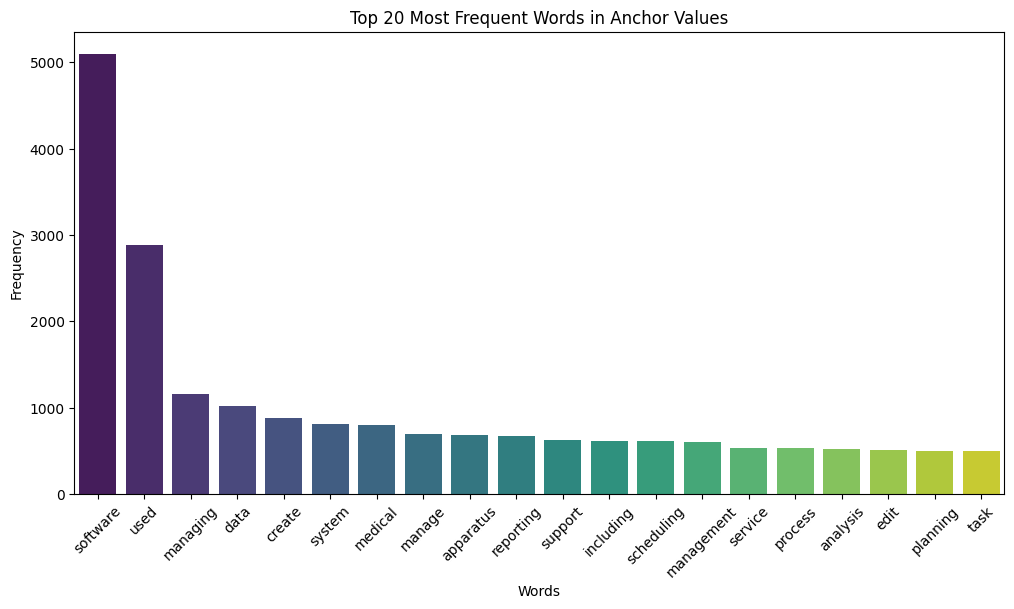

In [156]:

all_words = [word for words in lemmatized_clean_desc for word in words]

word_freq = Counter(all_words)

top_words = word_freq.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


6. A frequency bar plot was visualised to get a basic understanding of the most used words in the dataset and it was evident that the term “software” was used a lot which makes sense as it is a technology tool dataset.
But it could cause a discrepency when perfroming clustering, thus it was added as a stopword manually

Custom stop word “software” was removed from the dictionary to avoid unnecessary importance to the word

In [157]:
custom_stopwords = stop_words.union({'software'})

lemmatized_clean_ext = lemmatized_stop_ext.apply(
    lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords]
)

lemmatized_clean_desc = lemmatized_stop_desc.apply(
    lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords]
)

print(lemmatized_clean_ext.head())
print(lemmatized_clean_desc.head())


0    [mapping, encompasses, toolsets, assist, creat...
1    [barcode, reading, technology, encompasses, re...
2    [elearning, encompasses, educational, system, ...
3    [medical, examination, measurement, monitoring...
4    [graphic, photo, imaging, encompasses, toolset...
Name: Technology Tool Extended Description, dtype: object
0    [used, create, edit, map, radio, communication...
1    [apparatus, read, barcode, typology, format, s...
2    [create, digital, interactive, learning, resou...
3    [medical, apparatus, support, clinical, examin...
4    [used, produce, edit, manipulate, digital, ima...
Name: Technology Tool Description, dtype: object


In [158]:
from collections import Counter

ext_word_counts = Counter([word for tokens in lemmatized_clean_ext for word in tokens])
desc_word_counts = Counter([word for tokens in lemmatized_clean_desc for word in tokens])

unique_words_ext = len(ext_word_counts)
unique_words_desc = len(desc_word_counts)

print(f"Unique words in lemmatized_clean_ext: {unique_words_ext}")
print(f"Unique words in lemmatized_clean_desc: {unique_words_desc}")


Unique words in lemmatized_clean_ext: 837
Unique words in lemmatized_clean_desc: 451


7. It was then seen that the technology tool dictionary had 451 unique words and the extended description has 837 unique tokens


🔹 Top 20 Bigrams:
technology tool: 2123
management system: 1634
tool may: 1385
encompasses system: 1283
data analysis: 1262
may interlink: 1072
statistical data: 1025
business intelligence: 937
intelligence decision: 937
decision support: 937
social medium: 915
encompasses toolsets: 894
system support: 713
creation editing: 653
project management: 632
procurement supply: 588
supply chain: 588
industrial control: 576
control automation: 576
inventory management: 555

🔹 Top 20 Trigrams:
technology tool may: 1147
statistical data analysis: 1025
business intelligence decision: 937
intelligence decision support: 937
procurement supply chain: 588
industrial control automation: 576
social medium platform: 549
tool may interlink: 473
project management incorporates: 443
management incorporates package: 443
incorporates package system: 443
package system support: 443
system support managing: 443
support managing project: 443
managing project planning: 443
project planning scheduling: 443
plann

<ipython-input-159-ffe5ff42c68e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


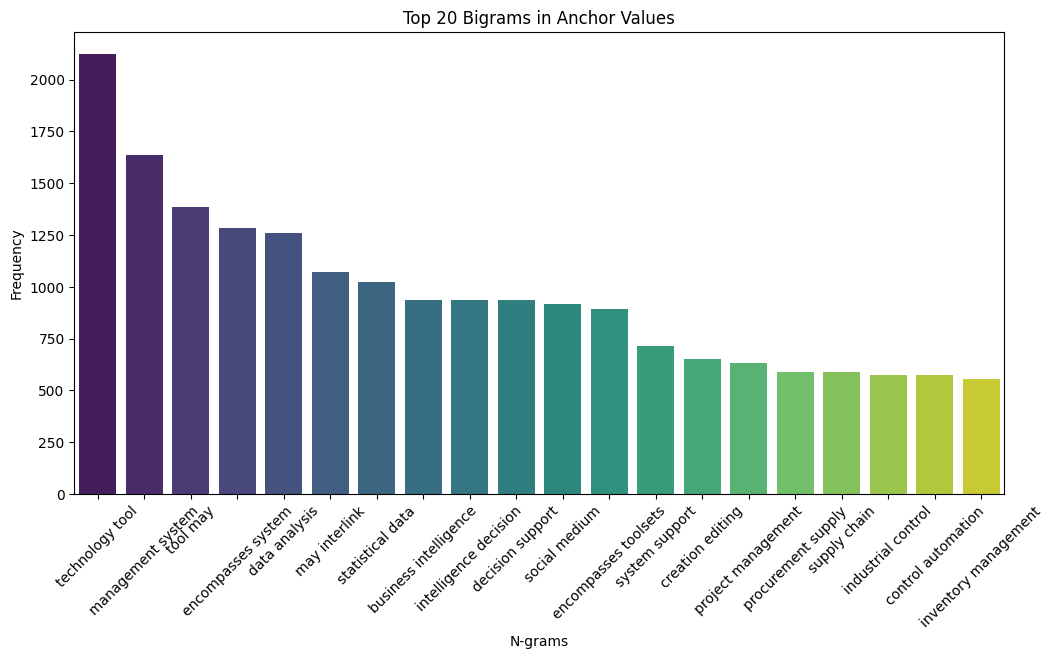

<ipython-input-159-ffe5ff42c68e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


In [159]:
filtered_words_flat = [word for words in lemmatized_clean_ext for word in words]

bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")

plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")


In [160]:
filtered_words_flat_desc = [word for words in lemmatized_clean_desc for word in words]

bigrams = list(ngrams(filtered_words_flat_desc, 2))
trigrams = list(ngrams(filtered_words_flat_desc, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")


🔹 Top 20 Bigrams:
used create: 747
planning documenting: 443
documenting managing: 443
managing project: 443
project including: 443
including managing: 443
managing milestone: 443
milestone task: 443
task scheduling: 443
scheduling budgeting: 443
used manage: 376
system used: 339
gathering storage: 305
storage analysis: 305
analysis reporting: 305
reporting data: 305
data required: 305
required make: 305
make strategic: 305
strategic business: 305

🔹 Top 20 Trigrams:
planning documenting managing: 443
documenting managing project: 443
managing project including: 443
project including managing: 443
including managing milestone: 443
managing milestone task: 443
milestone task scheduling: 443
task scheduling budgeting: 443
gathering storage analysis: 305
storage analysis reporting: 305
analysis reporting data: 305
reporting data required: 305
data required make: 305
required make strategic: 305
make strategic business: 305
strategic business decision: 305
system used manage: 271
managing

In [161]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()


plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")



<ipython-input-161-e5110e52085d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


<ipython-input-161-e5110e52085d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


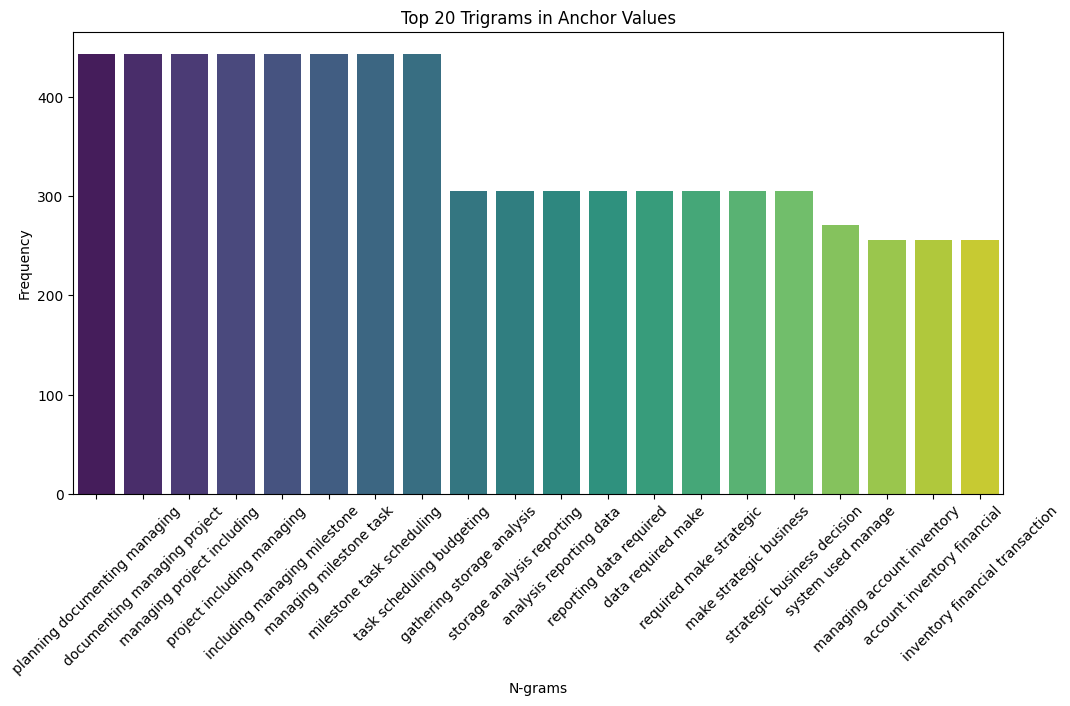

In [162]:
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")

A bi-gram and a tri-gram analysis was conducted and it was observed that the bi-grams showed a lot more diversity compared to tri-gram for the “extended description” which seemed to show a sequence like pattern. While bi-gram and tri-grams both showed a pattern for the technology tools “description” dictionary. Thus it was decided that “extended description” will be used for this research question.

Extended Description also has more words in the vocabulary that will ultimately help the model

#### 5.2.2 Clustering

As the core of this research question is to cluster these tech tools based on jobs according to their extended descriptions, clustering was chosen as an appropriate technique.

K-Means clustering was chosen as it works well with high dimensional data (tfidf vectors here) and it is easily interpretable

In [163]:
lemmatized_clean_desc.head()

0    [used, create, edit, map, radio, communication...
1    [apparatus, read, barcode, typology, format, s...
2    [create, digital, interactive, learning, resou...
3    [medical, apparatus, support, clinical, examin...
4    [used, produce, edit, manipulate, digital, ima...
Name: Technology Tool Description, dtype: object

In [164]:
tt_nlp_cluster = tt_nlp_aggregated.copy()

In [165]:
tt_nlp_cluster.head()

ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...   
4  Graphic design and imagery technologies Commun...   

                Technology Tool Category Description  \
0  Systems for real-time navigation, mapping and ...   
1  Systems for logistics, vehicle despatch, and f...   
2  Systems for managing student records and educa...   
3  Medical instruments and technologies for treat...   
4  Software for graphic design and photographic e...   

                                     Technology Tool  \
0  Mapping software Aviation and marine communica...   
1  Barcode reading technologies Human resources s...   
2  E-learning software Project management softwar...   
3  Medical examination, measurement, and monitori...   
4  Graphics or photo imaging software Audio/video...   

                         Technology Tool Description  \
0  software used to create and edit maps radio an...   
1  apparatus that reads d and d barcode typologie...   
2  software to create digital and interactive lea...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                Technology Tool Extended Description Emerging/Trending Flag  \
0  mapping software encompasses software and tool...                   None   
1  barcode reading technologies encompasses the r...                   None   
2  elearning software encompasses software and ed...                   None   
3  medical examination measurement and monitoring...                   None   
4  graphics or photo imaging software encompasses...                   None   

                                  ANZSCO Description  \
0  Commercially harvests abalone from underwater ...   
1  Directly supervise and coordinate the activiti...   
2  Support and teaches the learning outcomes of A...   
3  Provides nursing care to individuals, families...   
4  Assists Aboriginal and Torres Strait Islander ...   

   Technology Tool Example Count  
0                           12.0  
1                           32.0  
2                           25.0  
3                           13.0  
4                           15.0

In [166]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [167]:
tt_nlp_cluster["lemmatized_clean_ext"] = lemmatized_clean_ext
print(tt_nlp_cluster.head())


                                        ANZSCO Title        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code_x Sub-Profile Code_x  \
0         399911                S01   
1         149999                N01   
2         241599                N01   
3         254499                N08   
4         422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Logistics and fleet management systems Payroll...   
2  Education and student management platforms Pro...   
3  Physical examination, therapy and treatment te...  

As it was seen from the NLP based analysis, term frequency mattered in bi-grams, thus TF-IDF vectorization was used before clustering as a pre-processing step [Section 5.2.1](#section-5-2-1)


In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

tt_nlp_cluster['lemmatized_clean_ext_str'] = tt_nlp_cluster['lemmatized_clean_ext'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Only biigrams

X = vectorizer.fit_transform(tt_nlp_cluster['lemmatized_clean_ext_str'])
print(X.shape)


(1317, 3350)


In [169]:
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 3350


In [170]:
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
mapping encompasses => 1806
encompasses toolsets => 1001
toolsets assist => 3106
assist creation => 269
creation cartographic => 613


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [172]:
def plot_elbow_method(X):
    sse = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

In [173]:
def plot_silhouette_method(X):
    silhouette_avg_scores = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_avg_scores.append(silhouette_avg)
    plt.figure()
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

In [174]:
plot_elbow_method(X)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7feeccea79c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libscipy_openblas-c128ec02.

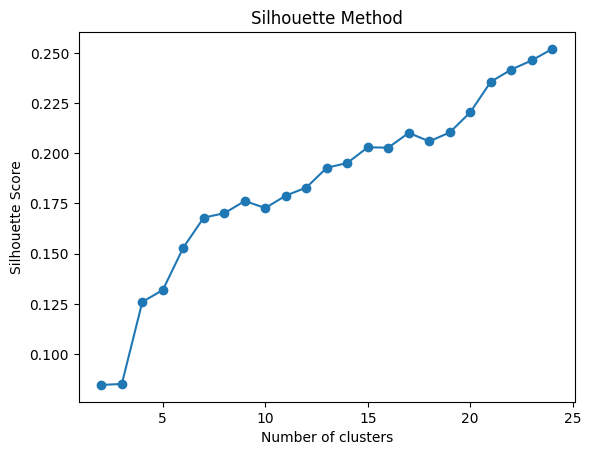

In [175]:
plot_silhouette_method(X)

After performing the Silhouette and Elbow Method Analysis, it was observed that having 9 clusters gave us a good trade-off between an optimal score for both. It avoided overfitting while also maintaining interpretability.

In [176]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=42)

In [177]:
labels = kmeans.labels_
print(labels)

[1 4 5 ... 0 6 8]


In [178]:
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.17623420507510792


In [179]:
clustered_docs = pd.DataFrame({'Document': tt_nlp_cluster['lemmatized_clean_ext'], 'Cluster': labels})

In [180]:
merged_df = pd.concat([clustered_docs, tt_nlp_cluster], axis=1)


In [181]:
for i in range(5):
    print(f"\nCluster {i} documents:")
    print(clustered_docs[clustered_docs['Cluster'] == i].head(3))


Cluster 0 documents:
                                             Document  Cluster
28  [scientific, medical, instrument, steriliser, ...        0
30  [scientific, medical, instrument, steriliser, ...        0
32  [industrial, control, automation, encompasses,...        0

Cluster 1 documents:
                                             Document  Cluster
0   [mapping, encompasses, toolsets, assist, creat...        1
24  [technical, design, modelling, encompasses, ap...        1
25  [mapping, encompasses, toolsets, assist, creat...        1

Cluster 2 documents:
                                             Document  Cluster
3   [medical, examination, measurement, monitoring...        2
15  [alternative, complementary, therapy, equipmen...        2
22  [patient, management, system, electronics, hea...        2

Cluster 3 documents:
                                            Document  Cluster
6  [financial, analysis, encompasses, utility, mo...        3
7  [inventory, management, encom

##### **5.2.2.1 Evaluation**

On an initial look, it seems like the clustering algorithm is working pretty good as it is able to cluster jobs which are similar to "Data Scientist" like "Data Analyst" and "Mathematician"

In [182]:
data_scientist_cluster = merged_df[merged_df['ANZSCO Title'] == 'Data Scientist']
data_scientist_cluster1 = merged_df[merged_df['ANZSCO Title'] == 'Data Analyst']
data_scientist_cluster2 = merged_df[merged_df['ANZSCO Title'] == 'Mathematician']

print(data_scientist_cluster[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster1[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster2[['ANZSCO Title', 'Cluster']])


       ANZSCO Title  Cluster
303  Data Scientist        5
     ANZSCO Title  Cluster
301  Data Analyst        5
      ANZSCO Title  Cluster
715  Mathematician        5


But this still doesn't prove that the model works well on a general context, thus we will export the filtered dataset to go through it manually for an extrensic evaluation

In [183]:
data_scientist_clusters = merged_df[merged_df['ANZSCO Title'] == 'Data Scientist']['Cluster'].unique()

same_cluster_df = merged_df[merged_df['Cluster'].isin(data_scientist_clusters)]

print(same_cluster_df.head())

                                             Document  Cluster  \
2   [elearning, encompasses, educational, system, ...        5   
4   [graphic, photo, imaging, encompasses, toolset...        5   
11  [document, management, code, versioning, encom...        5   
12  [instant, messaging, encompasses, toolsets, en...        5   
14  [data, warehousing, service, incorporates, har...        5   

                                         ANZSCO Title  \
2                        Aboriginal Education Teacher   
4   Aboriginal and Torres Strait Islander Educatio...   
11                                  Acoustic Engineer   
12                                 Activities Officer   
14                                            Actuary   

          Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
2   NEC Category Occupation         241599                N01   
4                  ANZSCO 6         422111               None   
11  NEC Category Occupation         233999                N01   


In [184]:
same_cluster_df[['ANZSCO Title', 'Cluster']].to_excel('TT_Cluster_Job.xlsx', index=False)

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans



kmeans_labels = labels
use_pca = False

if use_pca:
    pca = PCA(n_components=50, random_state=42)
    X_reduced = pca.fit_transform(X.toarray())
else:
    X_reduced = X.toarray()

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(X_reduced)

df_tsne = pd.DataFrame(tsne_result, columns=['TSNE 1', 'TSNE 2'])
df_tsne['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE 1', y='TSNE 2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Upon visualising the clusters formed by the model, they look pretty seperable and distinctive, which is good news for the model

## **5.3 Research Question 3**

Can similar occupations be clustered based on their specialist skills descriptions to assist users in finding related jobs?

This research question was answered using the specialist tasks merged dataframe.

##### 5.3.1 NLP based Data Preparation and Analysis

The Skills Statement feature of the merged dataframe was joined based on different ANZSCO Titles

In [186]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            30450 non-null  object 
 1   ANZSCO Code_x                30450 non-null  int64  
 2   Sub-Profile Code_x           6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/Trending Flag       1402 non-null   object 
 7   Specialist Cluster_x         30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family_x             30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
 12  ANZSCO Description           30450 non-null  object 
dtypes: float64(3), i

Similar to [Section 5.2.1](#section-5-2-1), Emerging/Trending Flag and Sub profile code had some missing values but they didn’t contribute to the objective of the project and thus were ignored.


In [187]:
st_nlp = st_merged_df.copy()

In [188]:
st_nlp.head()

Occupation Type_x  ANZSCO Code_x Sub-Profile Code_x  \
0          ANZSCO 4           1111                NaN   
1          ANZSCO 4           1111                NaN   
2          ANZSCO 4           1111                NaN   
3          ANZSCO 4           1111                NaN   
4          ANZSCO 4           1111                NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1  Chief Executives and Managing Directors   
2  Chief Executives and Managing Directors   
3  Chief Executives and Managing Directors   
4  Chief Executives and Managing Directors   

                                     Specialist Task  % of time spent on task  \
0  Direct or manage financial activities or opera...                   0.1302   
1     Direct department or organisational activities                   0.1117   
2  Direct sales, marketing or customer service ac...                   0.0808   
3  Communicate with others to arrange, coordinate...                   0.0665   
4  Analyse data to assess operational or project ...                   0.0651   

  Emerging/Trending Flag                               Specialist Cluster_x  \
0                    NaN  Manage, monitor and undertake financial activi...   
1               Trending               Manage services, staff or activities   
2                    NaN               Manage services, staff or activities   
3                    NaN             Communicate or collaborate with others   
4                    NaN           Use data to inform operational decisions   

    % of time spent on cluster                              Cluster Family_x  \
0                       0.1644  Business operations and financial activities   
1                       0.2128  Business operations and financial activities   
2                       0.2128  Business operations and financial activities   
3                       0.0750               Communication and collaboration   
4                       0.1009                Data, analytics, and databases   

   % of time spent on family  \
0                     0.5322   
1                     0.5322   
2                     0.5322   
3                     0.0890   
4                     0.1370   

                                    Skills Statement  \
0  Direct and oversee the financial operations of...   
1  Direct and oversee the activities of a work un...   
2  Direct and oversee the sales, marketing, or cu...   
3  Coordinate with others in order to plan, organ...   
4  Analyse qualitative and quantitative data aris...   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  Chief Executives and Managing Directors determ...  
2  Chief Executives and Managing Directors determ...  
3  Chief Executives and Managing Directors determ...  
4  Chief Executives and Managing Directors determ...

The Skills Statement feature of the merged dataframe was joined based on different ANZSCO Titles

In [189]:
aggregated_st = st_nlp.groupby('ANZSCO Title').agg({
    'Specialist Task': lambda x: ''.join(x.dropna().unique()),
    'Specialist Cluster_x': lambda x: ''.join(x.dropna().unique()),
    'Skills Statement': lambda x: ''.join(x.dropna().unique()),
}).reset_index()

print(aggregated_st.head())


                              ANZSCO Title  \
0                            Abalone Diver   
1                         Abattoir Manager   
2             Aboriginal Education Teacher   
3  Aboriginal Education Worker Coordinator   
4                  Aboriginal Health Nurse   

                                     Specialist Task  \
0  Capture or kill animalsClean machinery or equi...   
1  Comply with industry animal welfare requiremen...   
2  Act as a subject matter expert to inform stake...   
3  Develop staff working understanding of the cul...   
4  Administer first aidAdminister non-intravenous...   

                                Specialist Cluster_x  \
0  Trap, capture or kill animalsClean equipment, ...   
1  Provide animal care and trainingCommunicate wi...   
2  Collaborate with stakeholdersSupport diversity...   
3  Support diversity and inclusionAnalyse and eva...   
4  Provide basic health careProvide health care o...   

                                    Skills Statem

The Skills Statement feature of the merged dataframe was joined based on different ANZSCO Titles

In [190]:
aggregated_st['Specialist Task'] = aggregated_st['Specialist Task'].apply(clean_text)
aggregated_st['Specialist Cluster_x'] = aggregated_st['Specialist Cluster_x'].apply(clean_text)
aggregated_st['Skills Statement'] = aggregated_st['Skills Statement'].apply(clean_text)

print(aggregated_st[['Specialist Task']].head())
print(aggregated_st[['Specialist Cluster_x']].head())


                                     Specialist Task
0  capture or kill animalsclean machinery or equi...
1  comply with industry animal welfare requiremen...
2  act as a subject matter expert to inform stake...
3  develop staff working understanding of the cul...
4  administer first aidadminister nonintravenous ...
                                Specialist Cluster_x
0  trap capture or kill animalsclean equipment to...
1  provide animal care and trainingcommunicate wi...
2  collaborate with stakeholderssupport diversity...
3  support diversity and inclusionanalyse and eva...
4  provide basic health careprovide health care o...


In [191]:
aggregated_st['token_Specialist_Task'] = aggregated_st['Specialist Task'].apply(word_tokenize)
aggregated_st['token_Specialist_Cluster_x'] = aggregated_st['Specialist Cluster_x'].apply(word_tokenize)
aggregated_st['token_Skills_Statement'] = aggregated_st['Skills Statement'].apply(word_tokenize)

print(aggregated_st[['token_Specialist_Task']].head())
print(aggregated_st[['token_Specialist_Cluster_x']].head())
print(aggregated_st[['token_Skills_Statement']].head())

                               token_Specialist_Task
0  [capture, or, kill, animalsclean, machinery, o...
1  [comply, with, industry, animal, welfare, requ...
2  [act, as, a, subject, matter, expert, to, info...
3  [develop, staff, working, understanding, of, t...
4  [administer, first, aidadminister, nonintraven...
                          token_Specialist_Cluster_x
0  [trap, capture, or, kill, animalsclean, equipm...
1  [provide, animal, care, and, trainingcommunica...
2  [collaborate, with, stakeholderssupport, diver...
3  [support, diversity, and, inclusionanalyse, an...
4  [provide, basic, health, careprovide, health, ...
                              token_Skills_Statement
0  [engage, in, the, capture, and, or, killing, o...
1  [apply, industry, standards, guidelines, and, ...
2  [act, as, a, subject, matter, expert, regardin...
3  [increase, staff, knowledge, of, the, cultural...
4  [take, action, immediately, following, an, ill...


Lemmatization was performed to maintain linguistic accuracy and preserve meaning as our task (identifying topics) benefited from this process. Although lemmatization is more computationally expensive, the dataset was relatively small, making the performance difference negligible.

In [192]:
lemmatizer = WordNetLemmatizer()

lemmatized_stop_task = aggregated_st['token_Specialist_Task'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_cluster = aggregated_st['token_Specialist_Cluster_x'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_statement = aggregated_st['token_Skills_Statement'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

aggregated_st['lemmatized_stop_Task'] = lemmatized_stop_task
aggregated_st['lemmatized_stop_Cluster_x'] = lemmatized_stop_cluster
aggregated_st['lemmatized_stop_Skills_Statement'] = lemmatized_stop_statement

print(aggregated_st[['lemmatized_stop_Task']].head())
print(aggregated_st[['lemmatized_stop_Cluster_x']].head())
print(aggregated_st[['lemmatized_stop_Skills_Statement']].head())

                                lemmatized_stop_Task
0  [capture, or, kill, animalsclean, machinery, o...
1  [comply, with, industry, animal, welfare, requ...
2  [act, a, a, subject, matter, expert, to, infor...
3  [develop, staff, working, understanding, of, t...
4  [administer, first, aidadminister, nonintraven...
                           lemmatized_stop_Cluster_x
0  [trap, capture, or, kill, animalsclean, equipm...
1  [provide, animal, care, and, trainingcommunica...
2  [collaborate, with, stakeholderssupport, diver...
3  [support, diversity, and, inclusionanalyse, an...
4  [provide, basic, health, careprovide, health, ...
                    lemmatized_stop_Skills_Statement
0  [engage, in, the, capture, and, or, killing, o...
1  [apply, industry, standard, guideline, and, re...
2  [act, a, a, subject, matter, expert, regarding...
3  [increase, staff, knowledge, of, the, cultural...
4  [take, action, immediately, following, an, ill...


As seen from previous experiments, the stop words would’ve created an issue when performing NLP tasks, thus they were removed as well.

In [193]:
lemmatized_clean_task = lemmatized_stop_task.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_cluster = lemmatized_stop_cluster.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_statement = lemmatized_stop_statement.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

aggregated_st['lemmatized_clean_Task'] = lemmatized_clean_task
aggregated_st['lemmatized_clean_Cluster_x'] = lemmatized_clean_cluster
aggregated_st['lemmatized_clean_Skills_Statement'] = lemmatized_clean_statement

print(aggregated_st[['lemmatized_clean_Task']].head())
print(aggregated_st[['lemmatized_clean_Cluster_x']].head())
print(aggregated_st[['lemmatized_clean_Skills_Statement']].head())

                               lemmatized_clean_Task
0  [capture, kill, animalsclean, machinery, equip...
1  [comply, industry, animal, welfare, requiremen...
2  [act, subject, matter, expert, inform, stakeho...
3  [develop, staff, working, understanding, cultu...
4  [administer, first, aidadminister, nonintraven...
                          lemmatized_clean_Cluster_x
0  [trap, capture, kill, animalsclean, equipment,...
1  [provide, animal, care, trainingcommunicate, o...
2  [collaborate, stakeholderssupport, diversity, ...
3  [support, diversity, inclusionanalyse, evaluat...
4  [provide, basic, health, careprovide, health, ...
                   lemmatized_clean_Skills_Statement
0  [engage, capture, killing, target, animal, saf...
1  [apply, industry, standard, guideline, regulat...
2  [act, subject, matter, expert, regarding, spec...
3  [increase, staff, knowledge, cultural, linguis...
4  [take, action, immediately, following, illness...


<ipython-input-194-7287b39b89a6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


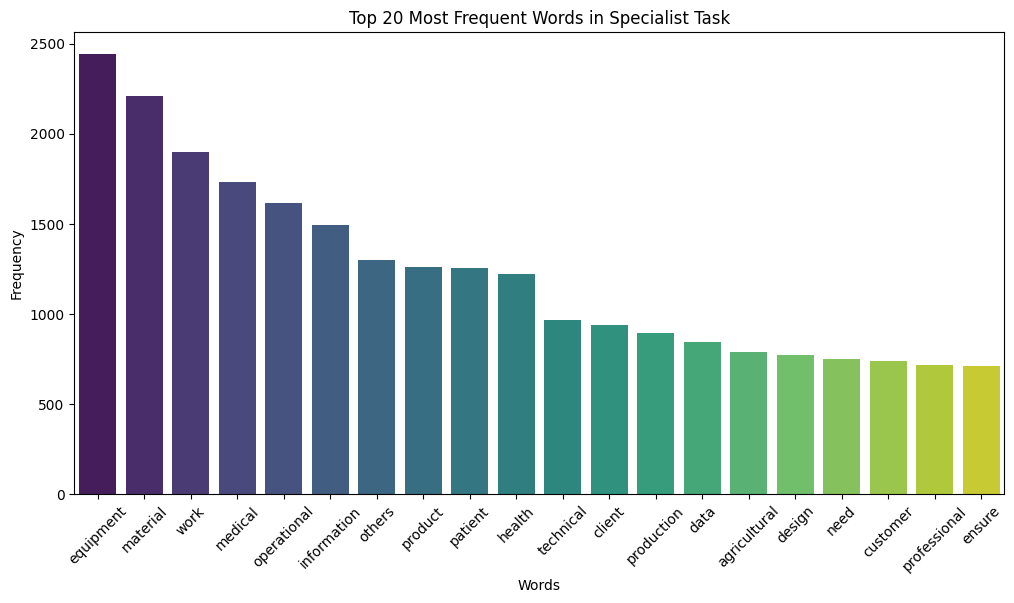

In [194]:
all_words = [word for words in lemmatized_clean_task for word in words]

word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Specialist Task")
plt.show()


A frequency bar plot was visualised to get a basic understanding of the most used words in the dataset. For Specialist Tasks “equipment” and “material” were the most frequent

<ipython-input-195-2155e02ebe75>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


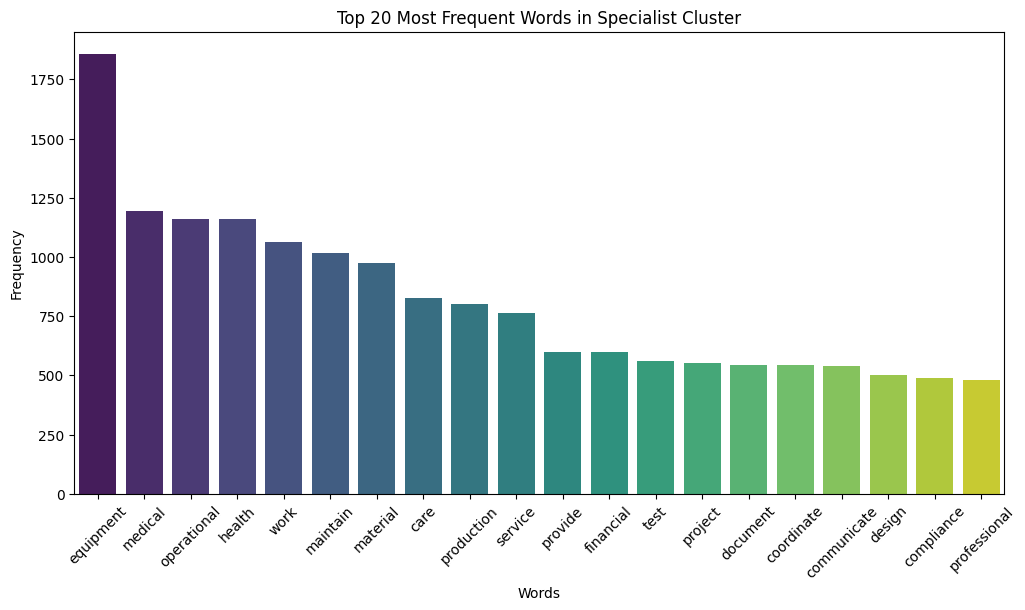

In [195]:
all_words = [word for words in lemmatized_clean_cluster for word in words]

word_freq = Counter(all_words)

top_words = word_freq.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Specialist Cluster")
plt.show()


while in Cluster Family also “equipment” was the most frequent term followed by “medical”.

In [196]:
all_words = [word for words in lemmatized_clean_statement for word in words]

word_freq = Counter(all_words)

top_words = word_freq.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Specialist Task Statement")
plt.show()


<ipython-input-196-c87d82326d55>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


In the task description feature, the most frequent word was “may” followed by “ensure”

Words like “may” and “equipment” although occur unusually quite frequently, they are still not removed as they might carry a meaning especially words like “equipment”

In [197]:
filtered_words_flat_task = [word for words in lemmatized_clean_task for word in words]

bigrams_task = list(ngrams(filtered_words_flat_task, 2))
trigrams_task = list(ngrams(filtered_words_flat_task, 3))

bigram_freq_task = Counter(bigrams_task)
trigram_freq_task = Counter(trigrams_task)

top_20_bigrams_task = bigram_freq_task.most_common(20)
top_20_trigrams_task = trigram_freq_task.most_common(20)

print("\n🔹 Top 20 Bigrams in Specialist Task:")
for bigram, count in top_20_bigrams_task:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams in Specialist Task:")
for trigram, count in top_20_trigrams_task:
    print(f"{' '.join(trigram)}: {count}")


🔹 Top 20 Bigrams in Specialist Task:
health care: 493
work piece: 461
material product: 320
material equipment: 319
equipment system: 283
ensure safety: 283
patient client: 258
organisational operational: 237
work order: 236
system ensure: 233
design blueprint: 226
blueprint specification: 226
specification diagram: 226
diagram work: 226
order documentation: 226
documentation determine: 226
determine work: 226
material resource: 222
material work: 221
ensure proper: 220

🔹 Top 20 Trigrams in Specialist Task:
equipment system ensure: 233
design blueprint specification: 226
blueprint specification diagram: 226
specification diagram work: 226
diagram work order: 226
work order documentation: 226
order documentation determine: 226
documentation determine work: 226
cultural diversity accessibility: 215
diversity accessibility need: 215
working understanding cultural: 207
understanding cultural diversity: 207
accessibility need others: 207
need others applies: 207
material resource equipmen

<ipython-input-198-deeba1e25232>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


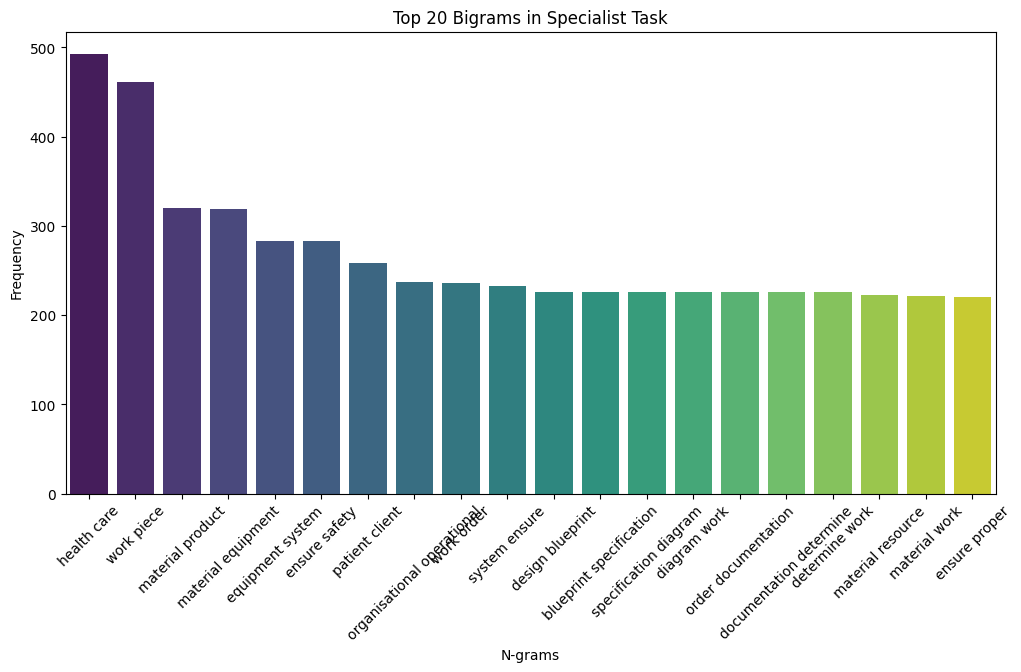

In [198]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_ngrams(top_20_bigrams_task, "Top 20 Bigrams in Specialist Task")

In [199]:
plot_ngrams(top_20_trigrams_task, "Top 20 Trigrams in Specialist Task")

<ipython-input-198-deeba1e25232>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


A bi-gram and a tri-gram analysis was conducted and it was observed that the tri-grams showed a lot more diversity and meaning compared to bi-gram for the “specialist task” which seemed to show a sequence like pattern

In [200]:
filtered_words_flat_cluster = [word for words in lemmatized_clean_cluster for word in words]

bigrams_cluster = list(ngrams(filtered_words_flat_cluster, 2))
trigrams_cluster = list(ngrams(filtered_words_flat_cluster, 3))

bigram_freq_cluster = Counter(bigrams_cluster)
trigram_freq_cluster = Counter(trigrams_cluster)

top_20_bigrams_cluster = bigram_freq_cluster.most_common(20)
top_20_trigrams_cluster = trigram_freq_cluster.most_common(20)

print("\n🔹 Top 20 Bigrams in Specialist Task:")
for bigram, count in top_20_bigrams_cluster:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams in Specialist Task:")
for trigram, count in top_20_trigrams_cluster:
    print(f"{' '.join(trigram)}: {count}")

def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_ngrams(top_20_bigrams_cluster, "Top 20 Bigrams in Specialist Cluster")

plot_ngrams(top_20_trigrams_cluster, "Top 20 Trigrams in Specialist Cluster")



🔹 Top 20 Bigrams in Specialist Task:
health care: 733
provide professional: 454
professional skill: 454
skill knowledge: 454
operational production: 410
test maintain: 394
maintain equipment: 393
customer service: 358
service communicate: 358
others coordinate: 333
handle resource: 290
equipment tool: 264
tool work: 264
health safety: 238
safety hazard: 238
hazard management: 238
management education: 238
service staff: 228
work order: 226
order project: 226

🔹 Top 20 Trigrams in Specialist Task:
provide professional skill: 454
professional skill knowledge: 454
test maintain equipment: 393
customer service communicate: 358
equipment tool work: 264
health safety hazard: 238
safety hazard management: 238
hazard management education: 238
work order project: 226
work area building: 222
compliance regulation standard: 214
document operational procedure: 210
production equipment make: 171
data inform operational: 169
calculate dimension distance: 166
dimension distance volume: 166
document 

<ipython-input-200-800b7640d6a6>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


<ipython-input-200-800b7640d6a6>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


Similarly a bi-gram and a tri-gram analysis was conducted and it was observed that the tri-grams showed a lot more diversity and meaning compared to bi-gram for the “specialists cluster” which seemed to show a sequence like pattern

In [201]:
filtered_words_flat_cluster = [word for words in lemmatized_clean_statement for word in words]

bigrams_cluster = list(ngrams(filtered_words_flat_cluster, 2))
trigrams_cluster = list(ngrams(filtered_words_flat_cluster, 3))

bigram_freq_cluster = Counter(bigrams_cluster)
trigram_freq_cluster = Counter(trigrams_cluster)

top_20_bigrams_cluster = bigram_freq_cluster.most_common(20)
top_20_trigrams_cluster = trigram_freq_cluster.most_common(20)

print("\n🔹 Top 20 Bigrams in Specialist Task Statement:")
for bigram, count in top_20_bigrams_cluster:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams in Specialist Task Statement:")
for trigram, count in top_20_trigrams_cluster:
    print(f"{' '.join(trigram)}: {count}")


🔹 Top 20 Bigrams in Specialist Task Statement:
may include: 8654
may involve: 6614
health safety: 2530
relevant information: 1989
order ensure: 1794
may also: 1589
work activity: 1445
technical knowledge: 1422
work health: 1391
specialist technical: 1367
include providing: 1274
order determine: 1261
adhere relevant: 1213
regulation standard: 1204
policy procedure: 1196
relevant regulation: 1092
ensure safety: 1080
relevant standard: 1045
safety standard: 1033
select appropriate: 1027

🔹 Top 20 Trigrams in Specialist Task Statement:
work health safety: 1391
may include providing: 1232
specialist technical knowledge: 1084
may also include: 895
project management task: 798
providing specialist technical: 742
procedure action reporting: 739
undertaking general project: 719
general project management: 719
requirement may include: 718
include providing specialist: 705
technical knowledge guidance: 705
may involve use: 696
personal protective equipment: 650
adhere relevant regulation: 645
fo

<ipython-input-202-c3e386796957>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


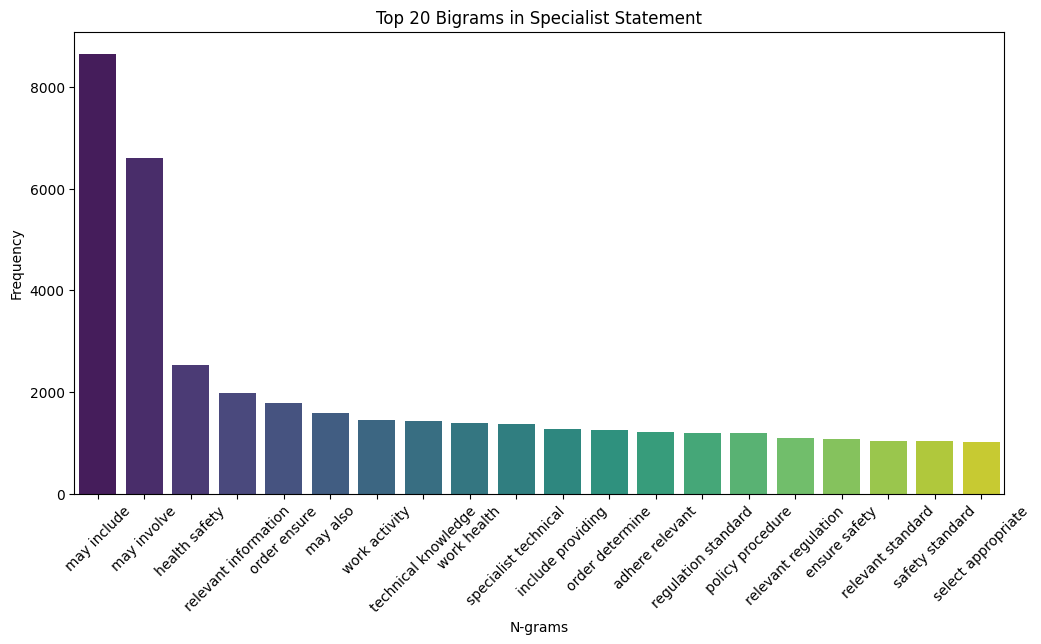

In [202]:
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_ngrams(top_20_bigrams_cluster, "Top 20 Bigrams in Specialist Statement")

<ipython-input-202-c3e386796957>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


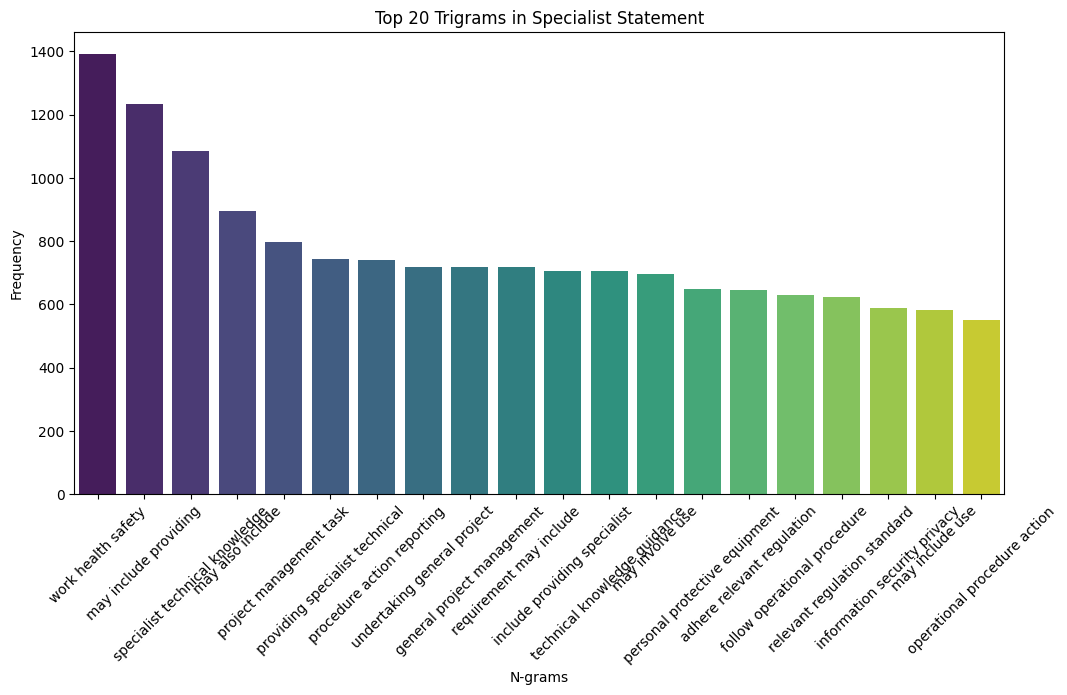

In [203]:
plot_ngrams(top_20_trigrams_cluster, "Top 20 Trigrams in Specialist Statement")


A bi-gram and a tri-gram analysis was conducted and it was observed that the tri-grams showed a lot more diversity and meaning compared to bi-gram for the “skills statement” which seemed to show a sequence like pattern

It was decided that “skills statement” will be used for this research question, as it provided a better dictionary scope and also it is more useful in a human understandable context.

##### 5.3.2 Clustering

As the core of this research question is to cluster these specialist skills based on jobs according to their descriptions, clustering was chosen as an appropriate technique.

K-Means clustering was chosen as it works well with high dimensional data (tfidf vectors here) and it is easily interpretable

In [204]:
lemmatized_clean_statement.head()

0    [engage, capture, killing, target, animal, saf...
1    [apply, industry, standard, guideline, regulat...
2    [act, subject, matter, expert, regarding, spec...
3    [increase, staff, knowledge, cultural, linguis...
4    [take, action, immediately, following, illness...
Name: token_Skills_Statement, dtype: object

In [205]:
st_nlp_cluster = aggregated_st.copy()

In [206]:
st_nlp_cluster.head()

ANZSCO Title  \
0                            Abalone Diver   
1                         Abattoir Manager   
2             Aboriginal Education Teacher   
3  Aboriginal Education Worker Coordinator   
4                  Aboriginal Health Nurse   

                                     Specialist Task  \
0  capture or kill animalsclean machinery or equi...   
1  comply with industry animal welfare requiremen...   
2  act as a subject matter expert to inform stake...   
3  develop staff working understanding of the cul...   
4  administer first aidadminister nonintravenous ...   

                                Specialist Cluster_x  \
0  trap capture or kill animalsclean equipment to...   
1  provide animal care and trainingcommunicate wi...   
2  collaborate with stakeholderssupport diversity...   
3  support diversity and inclusionanalyse and eva...   
4  provide basic health careprovide health care o...   

                                    Skills Statement  \
0  engage in the capture and or killing of target...   
1  apply industry standards guidelines and regula...   
2  act as a subject matter expert regarding a spe...   
3  increase staff knowledge of the cultural lingu...   
4  take action immediately following an illness o...   

                               token_Specialist_Task  \
0  [capture, or, kill, animalsclean, machinery, o...   
1  [comply, with, industry, animal, welfare, requ...   
2  [act, as, a, subject, matter, expert, to, info...   
3  [develop, staff, working, understanding, of, t...   
4  [administer, first, aidadminister, nonintraven...   

                          token_Specialist_Cluster_x  \
0  [trap, capture, or, kill, animalsclean, equipm...   
1  [provide, animal, care, and, trainingcommunica...   
2  [collaborate, with, stakeholderssupport, diver...   
3  [support, diversity, and, inclusionanalyse, an...   
4  [provide, basic, health, careprovide, health, ...   

                              token_Skills_Statement  \
0  [engage, in, the, capture, and, or, killing, o...   
1  [apply, industry, standards, guidelines, and, ...   
2  [act, as, a, subject, matter, expert, regardin...   
3  [increase, staff, knowledge, of, the, cultural...   
4  [take, action, immediately, following, an, ill...   

                                lemmatized_stop_Task  \
0  [capture, or, kill, animalsclean, machinery, o...   
1  [comply, with, industry, animal, welfare, requ...   
2  [act, a, a, subject, matter, expert, to, infor...   
3  [develop, staff, working, understanding, of, t...   
4  [administer, first, aidadminister, nonintraven...   

                           lemmatized_stop_Cluster_x  \
0  [trap, capture, or, kill, animalsclean, equipm...   
1  [provide, animal, care, and, trainingcommunica...   
2  [collaborate, with, stakeholderssupport, diver...   
3  [support, diversity, and, inclusionanalyse, an...   
4  [provide, basic, health, careprovide, health, ...   

                    lemmatized_stop_Skills_Statement  \
0  [engage, in, the, capture, and, or, killing, o...   
1  [apply, industry, standard, guideline, and, re...   
2  [act, a, a, subject, matter, expert, regarding...   
3  [increase, staff, knowledge, of, the, cultural...   
4  [take, action, immediately, following, an, ill...   

                               lemmatized_clean_Task  \
0  [capture, kill, animalsclean, machinery, equip...   
1  [comply, industry, animal, welfare, requiremen...   
2  [act, subject, matter, expert, inform, stakeho...   
3  [develop, staff, working, understanding, cultu...   
4  [administer, first, aidadminister, nonintraven...   

                          lemmatized_clean_Cluster_x  \
0  [trap, capture, kill, animalsclean, equipment,...   
1  [provide, animal, care, trainingcommunicate, o...   
2  [collaborate, stakeholderssupport, diversity, ...   
3  [support, diversity, inclusionanalyse, evaluat...   
4  [provide, basic, health, careprovide, health, ...   

                   lemmatized_clean_Skills_Sta

In [207]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

As it was seen from the NLP based analysis, term frequency mattered in tri-grams, thus TF-IDF vectorization was used before clustering as a pre-processing step.

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

st_nlp_cluster['lemmatized_clean_Skills_Statement_str'] = st_nlp_cluster['lemmatized_clean_Skills_Statement'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(st_nlp_cluster['lemmatized_clean_Skills_Statement_str'])

print(X.shape)


(1575, 101781)


In [209]:
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 101781


The total number of terms in the vocabulary for clustering were 101,781

In [210]:
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
engage capture killing => 27562
capture killing target => 11057
killing target animal => 46573
target animal safe => 92161
animal safe humane => 5660


In [211]:
def plot_elbow_method(X):
    sse = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

def plot_silhouette_method(X):
    silhouette_avg_scores = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_avg_scores.append(silhouette_avg)
    plt.figure()
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

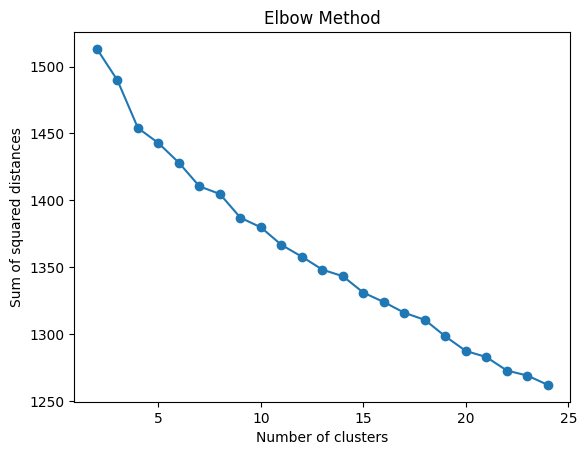

In [212]:
plot_elbow_method(X)

In [213]:
plot_silhouette_method(X)

After performing the Silhouette and Elbow Method Analysis, it was observed that having 7 clusters gave us a good trade-off between an optimal score for both. It avoided overfitting while also maintaining interpretability.

In [214]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=42)

In [215]:
labels = kmeans.labels_
print(labels)

[0 2 1 ... 2 6 4]


In [216]:
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.04020751369389064


In [217]:
clustered_docs1 = pd.DataFrame({'Document': st_nlp_cluster['lemmatized_clean_Skills_Statement'], 'Cluster': labels})

In [218]:
merged_df1 = pd.concat([clustered_docs1, tt_nlp_cluster], axis=1)


###### 5.3.2.1 Evaluation

In [219]:
data_scientist_cluster = merged_df1[merged_df1['ANZSCO Title'] == 'Data Scientist']
data_scientist_cluster1 = merged_df1[merged_df1['ANZSCO Title'] == 'Data Analyst']
data_scientist_cluster2 = merged_df1[merged_df1['ANZSCO Title'] == 'Mathematician']

print(data_scientist_cluster[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster1[['ANZSCO Title', 'Cluster']])
print(data_scientist_cluster2[['ANZSCO Title', 'Cluster']])




       ANZSCO Title  Cluster
303  Data Scientist        2
     ANZSCO Title  Cluster
301  Data Analyst        2
      ANZSCO Title  Cluster
715  Mathematician        4


The clustering here seems acceptable as although it is unable to put a Data Scientist and Mathematician in the same cluster, it is still able to do so for Data Analyst, thus a deeper extrinsic observation will be needed

Also as this is textual based clustering which is an unsupervised activity, extrinsic evaluation is recommended

In [220]:
data_scientist_clusters1 = merged_df1[merged_df1['ANZSCO Title'] == 'Data Scientist']['Cluster'].unique()

same_cluster_df1 = merged_df1[merged_df1['Cluster'].isin(data_scientist_clusters1)]

print(same_cluster_df1.head())


                                             Document  Cluster  \
1   [apply, industry, standard, guideline, regulat...        2   
39  [select, utilise, appropriate, tool, equipment...        2   
40  [select, utilise, appropriate, tool, equipment...        2   
41  [select, utilise, appropriate, tool, equipment...        2   
42  [load, material, item, cargo, equipment, onto,...        2   

                                        ANZSCO Title        Occupation Type_x  \
1                                   Abattoir Manager  NEC Category Occupation   
39  Aircraft Baggage Handler and Airline Ground Crew                 ANZSCO 6   
40          Aircraft Maintenance Engineer (Avionics)                 ANZSCO 6   
41        Aircraft Maintenance Engineer (Mechanical)                 ANZSCO 6   
42        Aircraft Maintenance Engineer (Structures)                 ANZSCO 6   

    ANZSCO Code_x Sub-Profile Code_x  \
1        149999.0                N01   
39       721911.0               None

In [221]:
same_cluster_df1[['ANZSCO Title', 'Cluster']].to_excel('ST_Cluster_Job.xlsx', index=False)

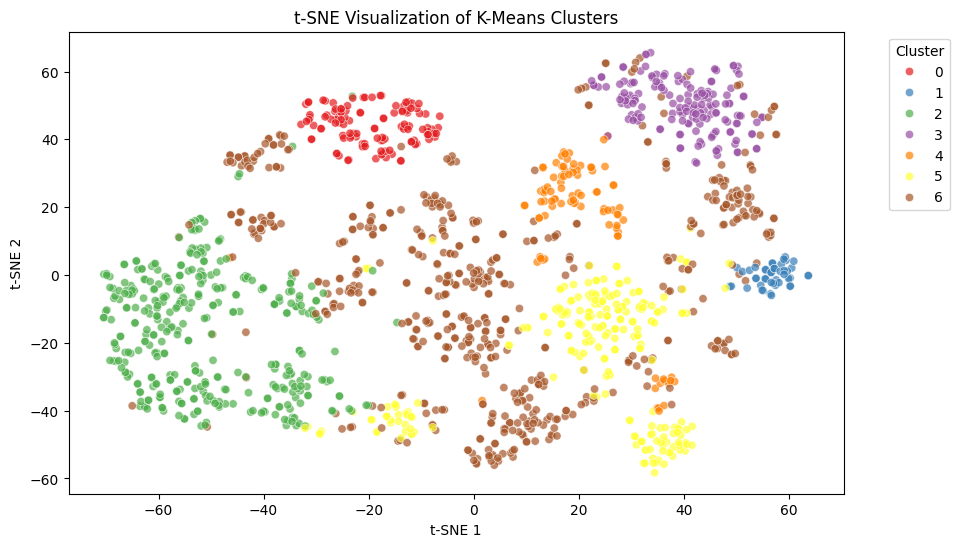

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


kmeans_labels = labels

use_pca = False

if use_pca:
    pca = PCA(n_components=50, random_state=42)
    X_reduced = pca.fit_transform(X.toarray())
else:
    X_reduced = X.toarray()

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(X_reduced)

df_tsne = pd.DataFrame(tsne_result, columns=['TSNE 1', 'TSNE 2'])
df_tsne['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE 1', y='TSNE 2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The clusters here seem quite distinguishable and seem to be making well defined clusters

# **6. Other Research Questions**


## 6.1 Research Question 4

In [223]:
abilities_df = pd.read_excel('Abilities to Work Context.xlsx')
occupation_df = pd.read_excel('Occupation Data.xlsx')
alter_occ_df = pd.read_excel('Alternate Titles.xlsx')
rel_occ_df = pd.read_excel('Related Occupations.xlsx')
skills_df = pd.read_excel('Skills to Work Context.xlsx')
tech_skills = pd.read_excel('Technology Skills.xlsx')




In [224]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   O*NET-SOC Code  1016 non-null   object
 1   Title           1016 non-null   object
 2   Description     1016 non-null   object
dtypes: object(3)
memory usage: 23.9+ KB


In [225]:
alter_occ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56560 entries, 0 to 56559
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   O*NET-SOC Code   56560 non-null  object
 1   Title            56560 non-null  object
 2   Alternate Title  56560 non-null  object
 3   Short Title      3574 non-null   object
 4   Source(s)        56560 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [226]:
alter_occ_df[alter_occ_df["Title"] == "Data Scientists"]["Alternate Title"].nunique()


33

In [227]:
alt_title_counts = alter_occ_df.groupby("Title")["Alternate Title"].nunique()

plt.figure(figsize=(10, 5))
sns.boxplot(y=alt_title_counts)
plt.ylabel("Number of Alternate Titles")
plt.title("Distribution of Alternate Titles per Job Title")
plt.show()


In [228]:
alt_title_counts = alter_occ_df.groupby("Title")["Alternate Title"].nunique()

top_10_titles = alt_title_counts.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_titles.values, y=top_10_titles.index, palette="viridis")
plt.xlabel("Number of Alternate Titles")
plt.ylabel("Job Title")
plt.title("Top 10 Job Titles with Most Alternate Titles")
plt.show()


<ipython-input-228-6c276cdd8acd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_titles.values, y=top_10_titles.index, palette="viridis")


In [229]:
rel_occ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18460 entries, 0 to 18459
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   O*NET-SOC Code          18460 non-null  object
 1   Title                   18460 non-null  object
 2   Related O*NET-SOC Code  18460 non-null  object
 3   Related Title           18460 non-null  object
 4   Relatedness Tier        18460 non-null  object
 5   Index                   18460 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 865.4+ KB


In [230]:
rel_occ_df[rel_occ_df["Title"] == "Data Scientists"]["Related Title"].nunique()


20

In [231]:
rel_occ_df[rel_occ_df["Title"] == "Data Scientists"]["Related Title"].unique()


array(['Statisticians', 'Financial Quantitative Analysts',
       'Statistical Assistants', 'Operations Research Analysts',
       'Bioinformatics Technicians', 'Mathematicians',
       'Bioinformatics Scientists', 'Biostatisticians',
       'Computer and Information Research Scientists',
       'Business Intelligence Analysts', 'Clinical Data Managers',
       'Database Architects', 'Management Analysts',
       'Geographic Information Systems Technologists and Technicians',
       'Social Science Research Assistants', 'Computer Systems Analysts',
       'Survey Researchers', 'Bioengineers and Biomedical Engineers',
       'Data Warehousing Specialists',
       'Market Research Analysts and Marketing Specialists'], dtype=object)